In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from diffusion import DiffusionModel, TargetType
from models import UNet
# from google.colab import drive
#drive.mount('/content/drive')

# img_path = '/content/drive/MyDrive/sprites_1788_16x16.npy'
# labels_path = '/content/drive/MyDrive/sprite_labels_nc_1788_16x16.npy'

img_path = 'sprites_1788_16x16.npy'
labels_path = 'sprite_labels_nc_1788_16x16.npy'

images = np.load(img_path)
labels = np.load(labels_path)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
images, indicies = np.unique(images, return_index=True, axis=0)

In [3]:
labels = labels[indicies]

In [4]:
labels.shape

(1722, 5)

In [5]:
images.shape

(1722, 16, 16, 3)

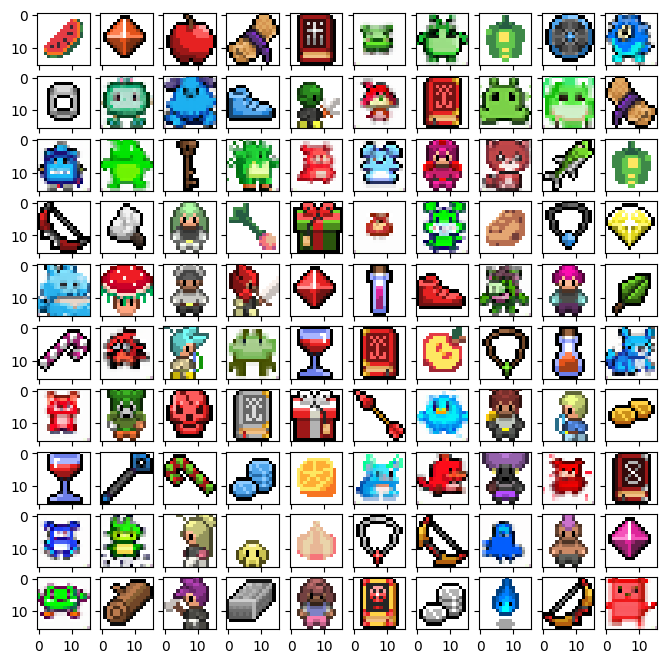

In [ ]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(8, 8), \
                        sharey=True, sharex=True)

img_indicies = np.random.choice(range(0, len(images)), 100, replace=False)
for img, fig_x in zip(img_indicies, ax.flatten()):
    im_val = images[img]
    fig_x.imshow(im_val)
    fig_x.grid(False)

## Dataset exploration

In [ ]:
labels = np.argmax(labels, axis=1)

In [ ]:
import pandas as pd

unique_values, counts = np.unique(labels, return_counts=True)
frequency_dict = dict(zip(unique_values, counts))

pd.Series(frequency_dict)

0    120
1    642
2    120
3    680
4    160
dtype: int64

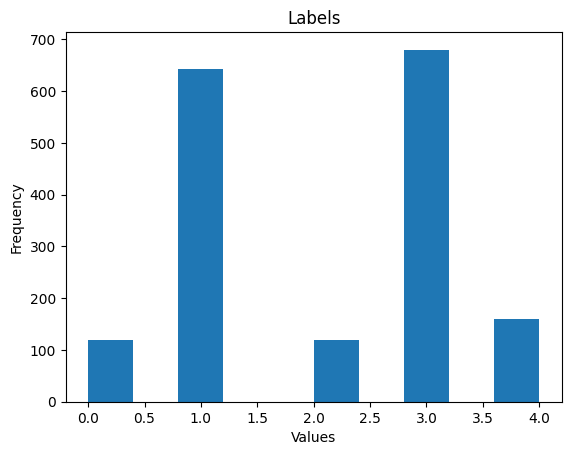

In [ ]:
plt.hist(labels)

plt.title('Labels')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

In [ ]:
from collections import defaultdict

classes_indicies = defaultdict(list)
for i, label in enumerate(labels):
    classes_indicies[label].append(i)

In [ ]:
def show_pics(indicies_array):
  fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(8, 8), \
                          sharey=True, sharex=True)

  img_indicies = np.random.choice(indicies_array, 100, replace=False)

  assert img_indicies.shape == np.unique(img_indicies).shape
  for img, fig_x in zip(img_indicies, ax.flatten()):
      im_val = images[img]
      fig_x.imshow(im_val)
      fig_x.grid(False)

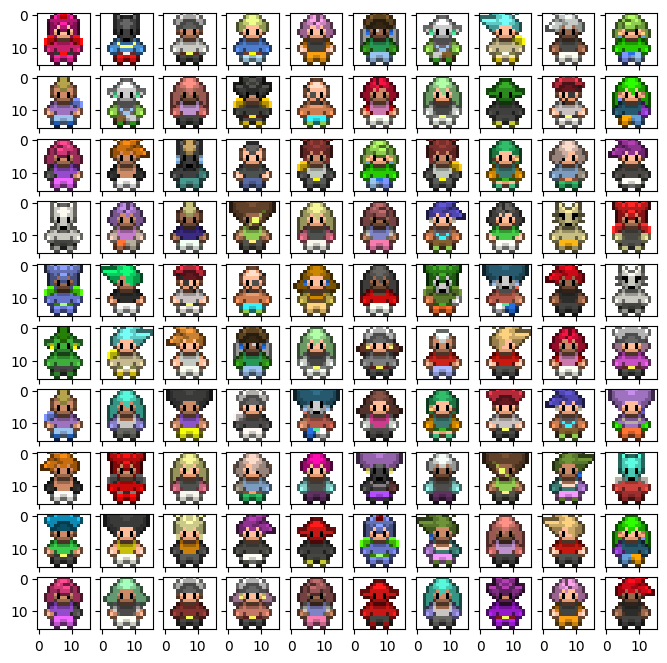

In [ ]:
show_pics(classes_indicies[0])

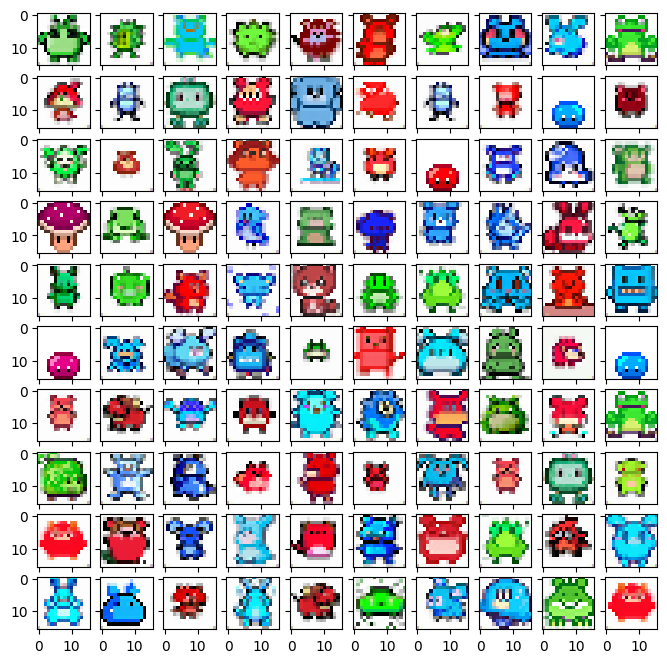

In [ ]:
show_pics(classes_indicies[1])

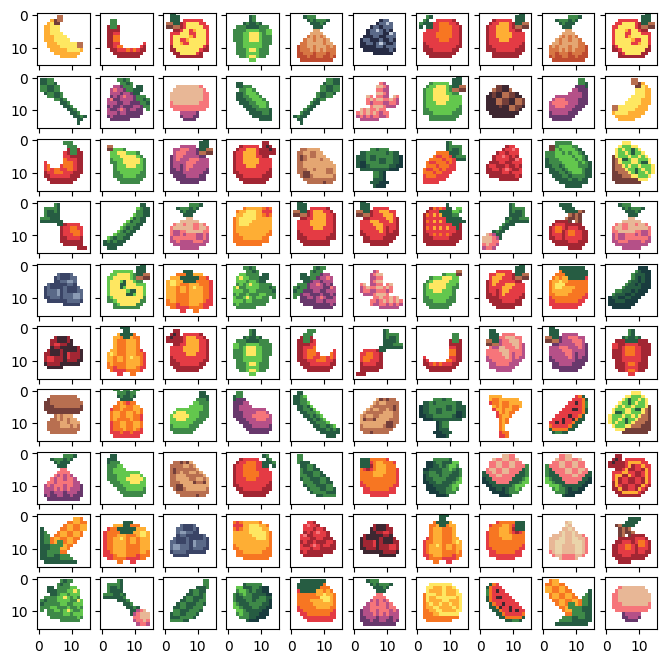

In [ ]:
show_pics(classes_indicies[2])

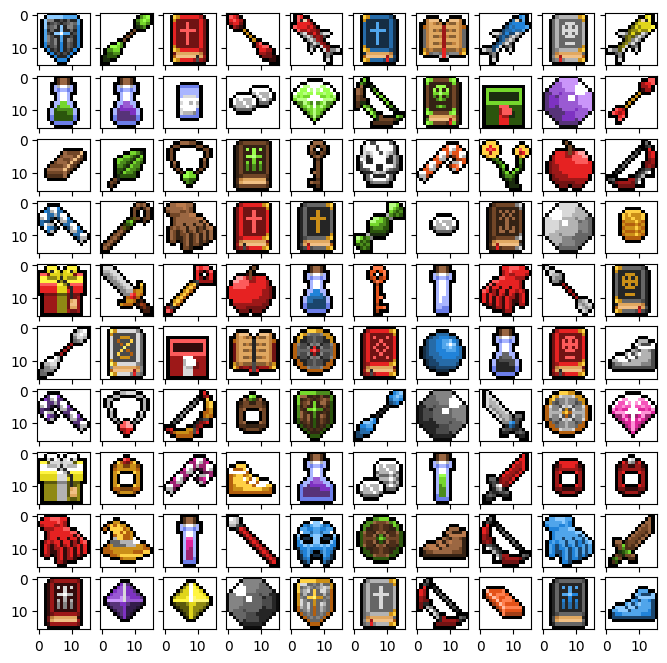

In [ ]:
show_pics(classes_indicies[3])

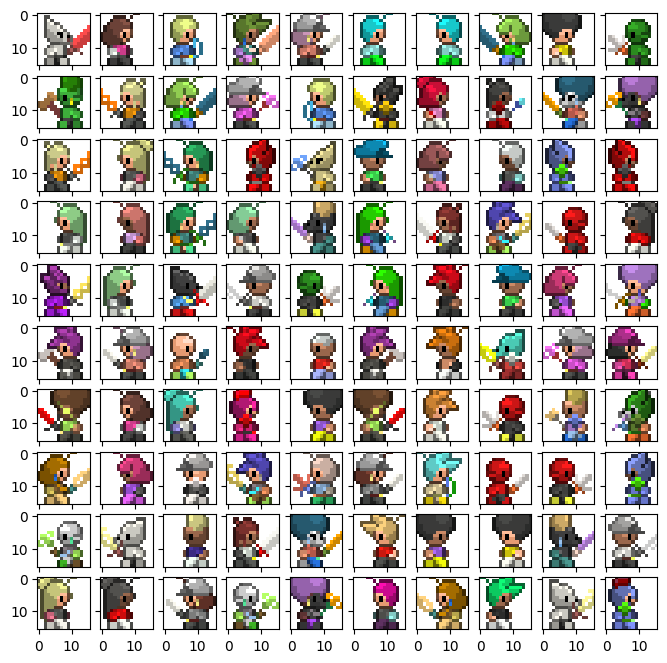

In [ ]:
show_pics(classes_indicies[4])

In [6]:
import torch
from torch.utils.data import Dataset

class ImageDataset(Dataset):
    def __init__(self, images, labels):
        self.data = (torch.Tensor(np.transpose(images, (0, 3, 1, 2)) / 255) - 0.5) * 2
        self.labels = torch.argmax(torch.Tensor(labels), dim=1, keepdim=True)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index], self.labels[index]

In [7]:
dataset = ImageDataset(images, labels)
batch_size = 256
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## DDPM predicting noise

In [ ]:
n_steps = 1000

model = UNet(in_channels=3, out_channels=3, n_steps=n_steps).to(device)
diffusion_model = DiffusionModel(model, img_size=16, n_steps=n_steps)
n_epochs = 500
losses = diffusion_model.train(n_epochs, data_loader, len(dataset))

# best loss 0.023

  0%|          | 1/500 [00:01<15:39,  1.88s/it]

Loss at epoch 1: 0.970



  0%|          | 2/500 [00:02<08:28,  1.02s/it]

Loss at epoch 2: 0.754



  1%|          | 3/500 [00:02<06:06,  1.36it/s]

Loss at epoch 3: 0.609



  1%|          | 4/500 [00:03<04:59,  1.66it/s]

Loss at epoch 4: 0.508



  1%|          | 5/500 [00:03<04:23,  1.88it/s]

Loss at epoch 5: 0.418



  1%|          | 6/500 [00:03<04:00,  2.05it/s]

Loss at epoch 6: 0.367



  1%|▏         | 7/500 [00:04<03:45,  2.19it/s]

Loss at epoch 7: 0.310



  2%|▏         | 8/500 [00:04<03:38,  2.25it/s]

Loss at epoch 8: 0.275



  2%|▏         | 9/500 [00:05<03:29,  2.34it/s]

Loss at epoch 9: 0.239



  2%|▏         | 10/500 [00:05<03:22,  2.42it/s]

Loss at epoch 10: 0.219



  2%|▏         | 11/500 [00:05<03:16,  2.49it/s]

Loss at epoch 11: 0.210



  2%|▏         | 12/500 [00:06<03:21,  2.42it/s]

Loss at epoch 12: 0.204



  3%|▎         | 13/500 [00:06<03:22,  2.40it/s]

Loss at epoch 13: 0.179



  3%|▎         | 14/500 [00:07<03:18,  2.45it/s]

Loss at epoch 14: 0.176



  3%|▎         | 15/500 [00:07<03:16,  2.47it/s]

Loss at epoch 15: 0.161



  3%|▎         | 16/500 [00:07<03:13,  2.51it/s]

Loss at epoch 16: 0.167



  3%|▎         | 17/500 [00:08<03:12,  2.51it/s]

Loss at epoch 17: 0.157



  4%|▎         | 18/500 [00:08<03:11,  2.51it/s]

Loss at epoch 18: 0.157



  4%|▍         | 19/500 [00:09<03:12,  2.50it/s]

Loss at epoch 19: 0.155



  4%|▍         | 20/500 [00:09<03:12,  2.50it/s]

Loss at epoch 20: 0.148



  4%|▍         | 21/500 [00:09<03:12,  2.49it/s]

Loss at epoch 21: 0.153



  4%|▍         | 22/500 [00:10<03:10,  2.50it/s]

Loss at epoch 22: 0.151



  5%|▍         | 23/500 [00:10<03:14,  2.46it/s]

Loss at epoch 23: 0.137



  5%|▍         | 24/500 [00:11<03:15,  2.44it/s]

Loss at epoch 24: 0.139



  5%|▌         | 25/500 [00:11<03:14,  2.44it/s]

Loss at epoch 25: 0.145



  5%|▌         | 26/500 [00:11<03:12,  2.46it/s]

Loss at epoch 26: 0.145



  5%|▌         | 27/500 [00:12<03:09,  2.50it/s]

Loss at epoch 27: 0.134



  6%|▌         | 28/500 [00:12<03:07,  2.52it/s]

Loss at epoch 28: 0.135



  6%|▌         | 29/500 [00:13<03:06,  2.53it/s]

Loss at epoch 29: 0.134



  6%|▌         | 30/500 [00:13<03:04,  2.54it/s]

Loss at epoch 30: 0.130



  6%|▌         | 31/500 [00:13<03:02,  2.57it/s]

Loss at epoch 31: 0.136



  6%|▋         | 32/500 [00:14<03:08,  2.48it/s]

Loss at epoch 32: 0.135



  7%|▋         | 33/500 [00:14<03:07,  2.49it/s]

Loss at epoch 33: 0.136



  7%|▋         | 34/500 [00:15<03:08,  2.47it/s]

Loss at epoch 34: 0.130



  7%|▋         | 35/500 [00:15<03:07,  2.48it/s]

Loss at epoch 35: 0.133



  7%|▋         | 36/500 [00:15<03:06,  2.48it/s]

Loss at epoch 36: 0.128



  7%|▋         | 37/500 [00:16<03:08,  2.45it/s]

Loss at epoch 37: 0.124



  8%|▊         | 38/500 [00:16<03:08,  2.46it/s]

Loss at epoch 38: 0.128



  8%|▊         | 39/500 [00:17<03:02,  2.53it/s]

Loss at epoch 39: 0.131



  8%|▊         | 40/500 [00:17<03:01,  2.54it/s]

Loss at epoch 40: 0.129



  8%|▊         | 41/500 [00:17<03:01,  2.53it/s]

Loss at epoch 41: 0.128



  8%|▊         | 42/500 [00:18<03:03,  2.49it/s]

Loss at epoch 42: 0.123



  9%|▊         | 43/500 [00:18<03:03,  2.50it/s]

Loss at epoch 43: 0.127



  9%|▉         | 44/500 [00:19<03:00,  2.52it/s]

Loss at epoch 44: 0.121



  9%|▉         | 45/500 [00:19<02:58,  2.55it/s]

Loss at epoch 45: 0.113



  9%|▉         | 46/500 [00:19<02:58,  2.54it/s]

Loss at epoch 46: 0.130



  9%|▉         | 47/500 [00:20<03:03,  2.47it/s]

Loss at epoch 47: 0.125



 10%|▉         | 48/500 [00:20<02:59,  2.51it/s]

Loss at epoch 48: 0.124



 10%|▉         | 49/500 [00:21<03:01,  2.49it/s]

Loss at epoch 49: 0.128



 10%|█         | 50/500 [00:21<03:01,  2.48it/s]

Loss at epoch 50: 0.116



 10%|█         | 51/500 [00:21<03:04,  2.43it/s]

Loss at epoch 51: 0.123



 10%|█         | 52/500 [00:22<03:06,  2.40it/s]

Loss at epoch 52: 0.123



 11%|█         | 53/500 [00:22<03:05,  2.41it/s]

Loss at epoch 53: 0.117



 11%|█         | 54/500 [00:23<03:05,  2.41it/s]

Loss at epoch 54: 0.113



 11%|█         | 55/500 [00:23<03:00,  2.46it/s]

Loss at epoch 55: 0.111



 11%|█         | 56/500 [00:23<02:57,  2.50it/s]

Loss at epoch 56: 0.113



 11%|█▏        | 57/500 [00:24<02:56,  2.50it/s]

Loss at epoch 57: 0.119



 12%|█▏        | 58/500 [00:24<02:56,  2.51it/s]

Loss at epoch 58: 0.113



 12%|█▏        | 59/500 [00:25<03:02,  2.42it/s]

Loss at epoch 59: 0.115



 12%|█▏        | 60/500 [00:25<03:09,  2.32it/s]

Loss at epoch 60: 0.115



 12%|█▏        | 61/500 [00:26<03:07,  2.34it/s]

Loss at epoch 61: 0.117



 12%|█▏        | 62/500 [00:26<03:11,  2.28it/s]

Loss at epoch 62: 0.114



 13%|█▎        | 63/500 [00:26<03:06,  2.35it/s]

Loss at epoch 63: 0.111



 13%|█▎        | 64/500 [00:27<03:03,  2.38it/s]

Loss at epoch 64: 0.111



 13%|█▎        | 65/500 [00:27<03:08,  2.31it/s]

Loss at epoch 65: 0.109



 13%|█▎        | 66/500 [00:28<03:03,  2.37it/s]

Loss at epoch 66: 0.103



 13%|█▎        | 67/500 [00:28<03:01,  2.38it/s]

Loss at epoch 67: 0.106



 14%|█▎        | 68/500 [00:29<02:59,  2.41it/s]

Loss at epoch 68: 0.109



 14%|█▍        | 69/500 [00:29<02:58,  2.41it/s]

Loss at epoch 69: 0.104



 14%|█▍        | 70/500 [00:29<02:57,  2.42it/s]

Loss at epoch 70: 0.110



 14%|█▍        | 71/500 [00:30<02:57,  2.42it/s]

Loss at epoch 71: 0.110



 14%|█▍        | 72/500 [00:30<02:55,  2.44it/s]

Loss at epoch 72: 0.113



 15%|█▍        | 73/500 [00:31<02:52,  2.48it/s]

Loss at epoch 73: 0.108



 15%|█▍        | 74/500 [00:31<02:53,  2.45it/s]

Loss at epoch 74: 0.112



 15%|█▌        | 75/500 [00:31<02:51,  2.48it/s]

Loss at epoch 75: 0.107



 15%|█▌        | 76/500 [00:32<02:50,  2.49it/s]

Loss at epoch 76: 0.112



 15%|█▌        | 77/500 [00:32<02:48,  2.51it/s]

Loss at epoch 77: 0.106



 16%|█▌        | 78/500 [00:33<02:48,  2.50it/s]

Loss at epoch 78: 0.101



 16%|█▌        | 79/500 [00:33<02:50,  2.47it/s]

Loss at epoch 79: 0.108



 16%|█▌        | 80/500 [00:33<02:53,  2.43it/s]

Loss at epoch 80: 0.102



 16%|█▌        | 81/500 [00:34<02:53,  2.42it/s]

Loss at epoch 81: 0.102



 16%|█▋        | 82/500 [00:34<02:58,  2.34it/s]

Loss at epoch 82: 0.105



 17%|█▋        | 83/500 [00:35<02:57,  2.35it/s]

Loss at epoch 83: 0.097



 17%|█▋        | 84/500 [00:35<02:54,  2.39it/s]

Loss at epoch 84: 0.101



 17%|█▋        | 85/500 [00:36<02:50,  2.43it/s]

Loss at epoch 85: 0.103



 17%|█▋        | 86/500 [00:36<02:51,  2.42it/s]

Loss at epoch 86: 0.104



 17%|█▋        | 87/500 [00:36<02:50,  2.43it/s]

Loss at epoch 87: 0.099



 18%|█▊        | 88/500 [00:37<02:48,  2.45it/s]

Loss at epoch 88: 0.101



 18%|█▊        | 89/500 [00:37<02:47,  2.46it/s]

Loss at epoch 89: 0.103



 18%|█▊        | 90/500 [00:38<02:49,  2.42it/s]

Loss at epoch 90: 0.107



 18%|█▊        | 91/500 [00:38<02:48,  2.43it/s]

Loss at epoch 91: 0.102



 18%|█▊        | 92/500 [00:38<02:44,  2.48it/s]

Loss at epoch 92: 0.100



 19%|█▊        | 93/500 [00:39<02:41,  2.52it/s]

Loss at epoch 93: 0.098



 19%|█▉        | 94/500 [00:39<02:40,  2.54it/s]

Loss at epoch 94: 0.098



 19%|█▉        | 95/500 [00:40<02:39,  2.54it/s]

Loss at epoch 95: 0.099



 19%|█▉        | 96/500 [00:40<02:37,  2.56it/s]

Loss at epoch 96: 0.094



 19%|█▉        | 97/500 [00:40<02:53,  2.32it/s]

Loss at epoch 97: 0.101



 20%|█▉        | 98/500 [00:41<02:47,  2.39it/s]

Loss at epoch 98: 0.090



 20%|█▉        | 99/500 [00:41<02:44,  2.43it/s]

Loss at epoch 99: 0.097



 20%|██        | 100/500 [00:42<02:43,  2.45it/s]

Loss at epoch 100: 0.094



 20%|██        | 101/500 [00:42<02:42,  2.46it/s]

Loss at epoch 101: 0.099



 20%|██        | 102/500 [00:42<02:39,  2.50it/s]

Loss at epoch 102: 0.096



 21%|██        | 103/500 [00:43<02:39,  2.50it/s]

Loss at epoch 103: 0.094



 21%|██        | 104/500 [00:43<02:37,  2.51it/s]

Loss at epoch 104: 0.093



 21%|██        | 105/500 [00:44<02:37,  2.51it/s]

Loss at epoch 105: 0.102



 21%|██        | 106/500 [00:44<02:35,  2.53it/s]

Loss at epoch 106: 0.097



 21%|██▏       | 107/500 [00:44<02:38,  2.48it/s]

Loss at epoch 107: 0.093



 22%|██▏       | 108/500 [00:45<02:41,  2.42it/s]

Loss at epoch 108: 0.097



 22%|██▏       | 109/500 [00:45<02:40,  2.43it/s]

Loss at epoch 109: 0.090



 22%|██▏       | 110/500 [00:46<02:38,  2.45it/s]

Loss at epoch 110: 0.094



 22%|██▏       | 111/500 [00:46<02:41,  2.41it/s]

Loss at epoch 111: 0.096



 22%|██▏       | 112/500 [00:46<02:36,  2.48it/s]

Loss at epoch 112: 0.097



 23%|██▎       | 113/500 [00:47<02:36,  2.47it/s]

Loss at epoch 113: 0.103



 23%|██▎       | 114/500 [00:47<02:33,  2.51it/s]

Loss at epoch 114: 0.095



 23%|██▎       | 115/500 [00:48<02:32,  2.52it/s]

Loss at epoch 115: 0.092



 23%|██▎       | 116/500 [00:48<02:32,  2.52it/s]

Loss at epoch 116: 0.097



 23%|██▎       | 117/500 [00:48<02:31,  2.52it/s]

Loss at epoch 117: 0.090



 24%|██▎       | 118/500 [00:49<02:29,  2.55it/s]

Loss at epoch 118: 0.090



 24%|██▍       | 119/500 [00:49<02:30,  2.53it/s]

Loss at epoch 119: 0.093



 24%|██▍       | 120/500 [00:50<02:30,  2.53it/s]

Loss at epoch 120: 0.097



 24%|██▍       | 121/500 [00:50<02:33,  2.47it/s]

Loss at epoch 121: 0.098



 24%|██▍       | 122/500 [00:50<02:29,  2.52it/s]

Loss at epoch 122: 0.089



 25%|██▍       | 123/500 [00:51<02:27,  2.55it/s]

Loss at epoch 123: 0.097



 25%|██▍       | 124/500 [00:51<02:29,  2.51it/s]

Loss at epoch 124: 0.098



 25%|██▌       | 125/500 [00:52<02:30,  2.50it/s]

Loss at epoch 125: 0.089



 25%|██▌       | 126/500 [00:52<02:32,  2.45it/s]

Loss at epoch 126: 0.087



 25%|██▌       | 127/500 [00:52<02:30,  2.47it/s]

Loss at epoch 127: 0.094



 26%|██▌       | 128/500 [00:53<02:27,  2.52it/s]

Loss at epoch 128: 0.097



 26%|██▌       | 129/500 [00:53<02:27,  2.52it/s]

Loss at epoch 129: 0.092



 26%|██▌       | 130/500 [00:54<02:25,  2.54it/s]

Loss at epoch 130: 0.086



 26%|██▌       | 131/500 [00:54<02:27,  2.50it/s]

Loss at epoch 131: 0.091



 26%|██▋       | 132/500 [00:54<02:27,  2.50it/s]

Loss at epoch 132: 0.093



 27%|██▋       | 133/500 [00:55<02:26,  2.51it/s]

Loss at epoch 133: 0.098



 27%|██▋       | 134/500 [00:55<02:26,  2.50it/s]

Loss at epoch 134: 0.092



 27%|██▋       | 135/500 [00:56<02:27,  2.48it/s]

Loss at epoch 135: 0.089



 27%|██▋       | 136/500 [00:56<02:28,  2.45it/s]

Loss at epoch 136: 0.090



 27%|██▋       | 137/500 [00:57<02:31,  2.40it/s]

Loss at epoch 137: 0.089



 28%|██▊       | 138/500 [00:57<02:32,  2.37it/s]

Loss at epoch 138: 0.091



 28%|██▊       | 139/500 [00:57<02:31,  2.38it/s]

Loss at epoch 139: 0.094



 28%|██▊       | 140/500 [00:58<02:31,  2.38it/s]

Loss at epoch 140: 0.097



 28%|██▊       | 141/500 [00:58<02:32,  2.36it/s]

Loss at epoch 141: 0.092



 28%|██▊       | 142/500 [00:59<02:32,  2.35it/s]

Loss at epoch 142: 0.084



 29%|██▊       | 143/500 [00:59<02:32,  2.34it/s]

Loss at epoch 143: 0.090



 29%|██▉       | 144/500 [00:59<02:29,  2.38it/s]

Loss at epoch 144: 0.090



 29%|██▉       | 145/500 [01:00<02:30,  2.36it/s]

Loss at epoch 145: 0.091



 29%|██▉       | 146/500 [01:00<02:28,  2.39it/s]

Loss at epoch 146: 0.085



 29%|██▉       | 147/500 [01:01<02:25,  2.43it/s]

Loss at epoch 147: 0.093



 30%|██▉       | 148/500 [01:01<02:24,  2.44it/s]

Loss at epoch 148: 0.085



 30%|██▉       | 149/500 [01:02<02:22,  2.46it/s]

Loss at epoch 149: 0.090



 30%|███       | 150/500 [01:02<02:21,  2.47it/s]

Loss at epoch 150: 0.089



 30%|███       | 151/500 [01:02<02:20,  2.49it/s]

Loss at epoch 151: 0.089



 30%|███       | 152/500 [01:03<02:18,  2.51it/s]

Loss at epoch 152: 0.084



 31%|███       | 153/500 [01:03<02:18,  2.51it/s]

Loss at epoch 153: 0.087



 31%|███       | 154/500 [01:03<02:17,  2.51it/s]

Loss at epoch 154: 0.085



 31%|███       | 155/500 [01:04<02:18,  2.49it/s]

Loss at epoch 155: 0.085



 31%|███       | 156/500 [01:04<02:17,  2.50it/s]

Loss at epoch 156: 0.088



 31%|███▏      | 157/500 [01:05<02:17,  2.49it/s]

Loss at epoch 157: 0.087



 32%|███▏      | 158/500 [01:05<02:17,  2.48it/s]

Loss at epoch 158: 0.091



 32%|███▏      | 159/500 [01:06<02:17,  2.47it/s]

Loss at epoch 159: 0.081



 32%|███▏      | 160/500 [01:06<02:18,  2.45it/s]

Loss at epoch 160: 0.089



 32%|███▏      | 161/500 [01:06<02:19,  2.43it/s]

Loss at epoch 161: 0.088



 32%|███▏      | 162/500 [01:07<02:21,  2.39it/s]

Loss at epoch 162: 0.080



 33%|███▎      | 163/500 [01:07<02:20,  2.41it/s]

Loss at epoch 163: 0.092



 33%|███▎      | 164/500 [01:08<02:20,  2.39it/s]

Loss at epoch 164: 0.089



 33%|███▎      | 165/500 [01:08<02:20,  2.39it/s]

Loss at epoch 165: 0.084



 33%|███▎      | 166/500 [01:08<02:20,  2.38it/s]

Loss at epoch 166: 0.087



 33%|███▎      | 167/500 [01:09<02:18,  2.41it/s]

Loss at epoch 167: 0.087



 34%|███▎      | 168/500 [01:09<02:17,  2.41it/s]

Loss at epoch 168: 0.079



 34%|███▍      | 169/500 [01:10<02:19,  2.37it/s]

Loss at epoch 169: 0.084



 34%|███▍      | 170/500 [01:10<02:15,  2.43it/s]

Loss at epoch 170: 0.084



 34%|███▍      | 171/500 [01:11<02:14,  2.45it/s]

Loss at epoch 171: 0.085



 34%|███▍      | 172/500 [01:11<02:12,  2.48it/s]

Loss at epoch 172: 0.084



 35%|███▍      | 173/500 [01:11<02:09,  2.53it/s]

Loss at epoch 173: 0.079



 35%|███▍      | 174/500 [01:12<02:08,  2.54it/s]

Loss at epoch 174: 0.083



 35%|███▌      | 175/500 [01:12<02:08,  2.54it/s]

Loss at epoch 175: 0.085



 35%|███▌      | 176/500 [01:12<02:07,  2.54it/s]

Loss at epoch 176: 0.088



 35%|███▌      | 177/500 [01:13<02:07,  2.53it/s]

Loss at epoch 177: 0.080



 36%|███▌      | 178/500 [01:13<02:09,  2.49it/s]

Loss at epoch 178: 0.081



 36%|███▌      | 179/500 [01:14<02:09,  2.47it/s]

Loss at epoch 179: 0.082



 36%|███▌      | 180/500 [01:14<02:10,  2.45it/s]

Loss at epoch 180: 0.084



 36%|███▌      | 181/500 [01:15<02:09,  2.46it/s]

Loss at epoch 181: 0.077



 36%|███▋      | 182/500 [01:15<02:07,  2.49it/s]

Loss at epoch 182: 0.083



 37%|███▋      | 183/500 [01:15<02:05,  2.53it/s]

Loss at epoch 183: 0.081



 37%|███▋      | 184/500 [01:16<02:07,  2.48it/s]

Loss at epoch 184: 0.086



 37%|███▋      | 185/500 [01:16<02:08,  2.46it/s]

Loss at epoch 185: 0.085



 37%|███▋      | 186/500 [01:17<02:06,  2.48it/s]

Loss at epoch 186: 0.080



 37%|███▋      | 187/500 [01:17<02:05,  2.49it/s]

Loss at epoch 187: 0.085



 38%|███▊      | 188/500 [01:17<02:05,  2.48it/s]

Loss at epoch 188: 0.081



 38%|███▊      | 189/500 [01:18<02:05,  2.48it/s]

Loss at epoch 189: 0.083



 38%|███▊      | 190/500 [01:18<02:02,  2.53it/s]

Loss at epoch 190: 0.086



 38%|███▊      | 191/500 [01:18<02:00,  2.56it/s]

Loss at epoch 191: 0.083



 38%|███▊      | 192/500 [01:19<02:00,  2.55it/s]

Loss at epoch 192: 0.079



 39%|███▊      | 193/500 [01:19<02:00,  2.55it/s]

Loss at epoch 193: 0.084



 39%|███▉      | 194/500 [01:20<02:02,  2.51it/s]

Loss at epoch 194: 0.078



 39%|███▉      | 195/500 [01:20<02:02,  2.49it/s]

Loss at epoch 195: 0.080



 39%|███▉      | 196/500 [01:20<02:02,  2.49it/s]

Loss at epoch 196: 0.079



 39%|███▉      | 197/500 [01:21<02:01,  2.49it/s]

Loss at epoch 197: 0.079



 40%|███▉      | 198/500 [01:21<02:02,  2.47it/s]

Loss at epoch 198: 0.080



 40%|███▉      | 199/500 [01:22<02:00,  2.50it/s]

Loss at epoch 199: 0.075



 40%|████      | 200/500 [01:22<02:00,  2.50it/s]

Loss at epoch 200: 0.082



 40%|████      | 201/500 [01:22<01:59,  2.50it/s]

Loss at epoch 201: 0.082



 40%|████      | 202/500 [01:23<01:58,  2.51it/s]

Loss at epoch 202: 0.082



 41%|████      | 203/500 [01:23<01:58,  2.51it/s]

Loss at epoch 203: 0.080



 41%|████      | 204/500 [01:24<01:57,  2.53it/s]

Loss at epoch 204: 0.075



 41%|████      | 205/500 [01:24<01:58,  2.49it/s]

Loss at epoch 205: 0.084



 41%|████      | 206/500 [01:24<01:58,  2.49it/s]

Loss at epoch 206: 0.079



 41%|████▏     | 207/500 [01:25<01:57,  2.50it/s]

Loss at epoch 207: 0.086



 42%|████▏     | 208/500 [01:25<01:58,  2.47it/s]

Loss at epoch 208: 0.075



 42%|████▏     | 209/500 [01:26<01:57,  2.48it/s]

Loss at epoch 209: 0.078



 42%|████▏     | 210/500 [01:26<01:57,  2.46it/s]

Loss at epoch 210: 0.073



 42%|████▏     | 211/500 [01:27<01:56,  2.48it/s]

Loss at epoch 211: 0.075



 42%|████▏     | 212/500 [01:27<01:56,  2.47it/s]

Loss at epoch 212: 0.080



 43%|████▎     | 213/500 [01:27<01:55,  2.48it/s]

Loss at epoch 213: 0.076



 43%|████▎     | 214/500 [01:28<01:55,  2.48it/s]

Loss at epoch 214: 0.080



 43%|████▎     | 215/500 [01:28<01:55,  2.47it/s]

Loss at epoch 215: 0.080



 43%|████▎     | 216/500 [01:29<01:53,  2.49it/s]

Loss at epoch 216: 0.081



 43%|████▎     | 217/500 [01:29<01:52,  2.51it/s]

Loss at epoch 217: 0.079



 44%|████▎     | 218/500 [01:29<01:55,  2.43it/s]

Loss at epoch 218: 0.080



 44%|████▍     | 219/500 [01:30<01:57,  2.38it/s]

Loss at epoch 219: 0.079



 44%|████▍     | 220/500 [01:30<01:58,  2.35it/s]

Loss at epoch 220: 0.080



 44%|████▍     | 221/500 [01:31<01:56,  2.39it/s]

Loss at epoch 221: 0.074



 44%|████▍     | 222/500 [01:31<01:55,  2.42it/s]

Loss at epoch 222: 0.074



 45%|████▍     | 223/500 [01:31<01:55,  2.39it/s]

Loss at epoch 223: 0.075



 45%|████▍     | 224/500 [01:32<01:54,  2.40it/s]

Loss at epoch 224: 0.073



 45%|████▌     | 225/500 [01:32<01:54,  2.41it/s]

Loss at epoch 225: 0.073



 45%|████▌     | 226/500 [01:33<01:54,  2.40it/s]

Loss at epoch 226: 0.077



 45%|████▌     | 227/500 [01:33<01:53,  2.40it/s]

Loss at epoch 227: 0.078



 46%|████▌     | 228/500 [01:34<01:52,  2.41it/s]

Loss at epoch 228: 0.071



 46%|████▌     | 229/500 [01:34<01:50,  2.45it/s]

Loss at epoch 229: 0.075



 46%|████▌     | 230/500 [01:34<01:52,  2.41it/s]

Loss at epoch 230: 0.074



 46%|████▌     | 231/500 [01:35<01:50,  2.44it/s]

Loss at epoch 231: 0.075



 46%|████▋     | 232/500 [01:35<01:50,  2.42it/s]

Loss at epoch 232: 0.076



 47%|████▋     | 233/500 [01:36<01:50,  2.41it/s]

Loss at epoch 233: 0.072



 47%|████▋     | 234/500 [01:36<01:49,  2.42it/s]

Loss at epoch 234: 0.073



 47%|████▋     | 235/500 [01:36<01:49,  2.41it/s]

Loss at epoch 235: 0.078



 47%|████▋     | 236/500 [01:37<01:48,  2.43it/s]

Loss at epoch 236: 0.073



 47%|████▋     | 237/500 [01:37<01:46,  2.46it/s]

Loss at epoch 237: 0.072



 48%|████▊     | 238/500 [01:38<01:46,  2.47it/s]

Loss at epoch 238: 0.076



 48%|████▊     | 239/500 [01:38<01:46,  2.46it/s]

Loss at epoch 239: 0.072



 48%|████▊     | 240/500 [01:39<01:54,  2.28it/s]

Loss at epoch 240: 0.076



 48%|████▊     | 241/500 [01:39<01:51,  2.32it/s]

Loss at epoch 241: 0.079



 48%|████▊     | 242/500 [01:39<01:47,  2.39it/s]

Loss at epoch 242: 0.071



 49%|████▊     | 243/500 [01:40<01:45,  2.43it/s]

Loss at epoch 243: 0.078



 49%|████▉     | 244/500 [01:40<01:43,  2.48it/s]

Loss at epoch 244: 0.072



 49%|████▉     | 245/500 [01:41<01:42,  2.49it/s]

Loss at epoch 245: 0.065



 49%|████▉     | 246/500 [01:41<01:42,  2.48it/s]

Loss at epoch 246: 0.075



 49%|████▉     | 247/500 [01:41<01:42,  2.47it/s]

Loss at epoch 247: 0.076



 50%|████▉     | 248/500 [01:42<01:43,  2.44it/s]

Loss at epoch 248: 0.067



 50%|████▉     | 249/500 [01:42<01:43,  2.42it/s]

Loss at epoch 249: 0.073



 50%|█████     | 250/500 [01:43<01:43,  2.42it/s]

Loss at epoch 250: 0.069



 50%|█████     | 251/500 [01:43<01:43,  2.39it/s]

Loss at epoch 251: 0.074



 50%|█████     | 252/500 [01:43<01:44,  2.38it/s]

Loss at epoch 252: 0.071



 51%|█████     | 253/500 [01:44<01:44,  2.37it/s]

Loss at epoch 253: 0.075



 51%|█████     | 254/500 [01:44<01:45,  2.34it/s]

Loss at epoch 254: 0.073



 51%|█████     | 255/500 [01:45<01:46,  2.30it/s]

Loss at epoch 255: 0.074



 51%|█████     | 256/500 [01:45<01:44,  2.33it/s]

Loss at epoch 256: 0.072



 51%|█████▏    | 257/500 [01:46<01:41,  2.40it/s]

Loss at epoch 257: 0.078



 52%|█████▏    | 258/500 [01:46<01:40,  2.41it/s]

Loss at epoch 258: 0.078



 52%|█████▏    | 259/500 [01:46<01:38,  2.44it/s]

Loss at epoch 259: 0.071



 52%|█████▏    | 260/500 [01:47<01:36,  2.48it/s]

Loss at epoch 260: 0.073



 52%|█████▏    | 261/500 [01:47<01:37,  2.45it/s]

Loss at epoch 261: 0.070



 52%|█████▏    | 262/500 [01:48<01:37,  2.44it/s]

Loss at epoch 262: 0.070



 53%|█████▎    | 263/500 [01:48<01:35,  2.48it/s]

Loss at epoch 263: 0.073



 53%|█████▎    | 264/500 [01:48<01:34,  2.51it/s]

Loss at epoch 264: 0.073



 53%|█████▎    | 265/500 [01:49<01:34,  2.49it/s]

Loss at epoch 265: 0.071



 53%|█████▎    | 266/500 [01:49<01:34,  2.47it/s]

Loss at epoch 266: 0.067



 53%|█████▎    | 267/500 [01:50<01:35,  2.45it/s]

Loss at epoch 267: 0.068



 54%|█████▎    | 268/500 [01:50<01:35,  2.44it/s]

Loss at epoch 268: 0.073



 54%|█████▍    | 269/500 [01:50<01:33,  2.47it/s]

Loss at epoch 269: 0.073



 54%|█████▍    | 270/500 [01:51<01:32,  2.48it/s]

Loss at epoch 270: 0.073



 54%|█████▍    | 271/500 [01:51<01:32,  2.49it/s]

Loss at epoch 271: 0.067



 54%|█████▍    | 272/500 [01:52<01:32,  2.47it/s]

Loss at epoch 272: 0.070



 55%|█████▍    | 273/500 [01:52<01:33,  2.44it/s]

Loss at epoch 273: 0.074



 55%|█████▍    | 274/500 [01:52<01:30,  2.50it/s]

Loss at epoch 274: 0.078



 55%|█████▌    | 275/500 [01:53<01:29,  2.51it/s]

Loss at epoch 275: 0.069



 55%|█████▌    | 276/500 [01:53<01:28,  2.52it/s]

Loss at epoch 276: 0.069



 55%|█████▌    | 277/500 [01:54<01:29,  2.50it/s]

Loss at epoch 277: 0.073



 56%|█████▌    | 278/500 [01:54<01:28,  2.52it/s]

Loss at epoch 278: 0.073



 56%|█████▌    | 279/500 [01:54<01:29,  2.48it/s]

Loss at epoch 279: 0.068



 56%|█████▌    | 280/500 [01:55<01:29,  2.45it/s]

Loss at epoch 280: 0.065



 56%|█████▌    | 281/500 [01:55<01:32,  2.38it/s]

Loss at epoch 281: 0.072



 56%|█████▋    | 282/500 [01:56<01:31,  2.39it/s]

Loss at epoch 282: 0.072



 57%|█████▋    | 283/500 [01:56<01:31,  2.37it/s]

Loss at epoch 283: 0.069



 57%|█████▋    | 284/500 [01:57<01:31,  2.37it/s]

Loss at epoch 284: 0.072



 57%|█████▋    | 285/500 [01:57<01:30,  2.37it/s]

Loss at epoch 285: 0.070



 57%|█████▋    | 286/500 [01:57<01:30,  2.36it/s]

Loss at epoch 286: 0.069



 57%|█████▋    | 287/500 [01:58<01:30,  2.36it/s]

Loss at epoch 287: 0.073



 58%|█████▊    | 288/500 [01:58<01:27,  2.42it/s]

Loss at epoch 288: 0.063



 58%|█████▊    | 289/500 [01:59<01:26,  2.43it/s]

Loss at epoch 289: 0.068



 58%|█████▊    | 290/500 [01:59<01:28,  2.38it/s]

Loss at epoch 290: 0.069



 58%|█████▊    | 291/500 [01:59<01:27,  2.38it/s]

Loss at epoch 291: 0.067



 58%|█████▊    | 292/500 [02:00<01:26,  2.40it/s]

Loss at epoch 292: 0.068



 59%|█████▊    | 293/500 [02:00<01:26,  2.38it/s]

Loss at epoch 293: 0.069



 59%|█████▉    | 294/500 [02:01<01:25,  2.40it/s]

Loss at epoch 294: 0.067



 59%|█████▉    | 295/500 [02:01<01:27,  2.34it/s]

Loss at epoch 295: 0.069



 59%|█████▉    | 296/500 [02:02<01:25,  2.40it/s]

Loss at epoch 296: 0.065



 59%|█████▉    | 297/500 [02:02<01:23,  2.44it/s]

Loss at epoch 297: 0.069



 60%|█████▉    | 298/500 [02:02<01:22,  2.45it/s]

Loss at epoch 298: 0.070



 60%|█████▉    | 299/500 [02:03<01:21,  2.46it/s]

Loss at epoch 299: 0.069



 60%|██████    | 300/500 [02:03<01:21,  2.45it/s]

Loss at epoch 300: 0.067



 60%|██████    | 301/500 [02:04<01:20,  2.46it/s]

Loss at epoch 301: 0.067



 60%|██████    | 302/500 [02:04<01:19,  2.48it/s]

Loss at epoch 302: 0.065



 61%|██████    | 303/500 [02:04<01:19,  2.48it/s]

Loss at epoch 303: 0.064



 61%|██████    | 304/500 [02:05<01:18,  2.48it/s]

Loss at epoch 304: 0.067



 61%|██████    | 305/500 [02:05<01:20,  2.43it/s]

Loss at epoch 305: 0.069



 61%|██████    | 306/500 [02:06<01:21,  2.39it/s]

Loss at epoch 306: 0.064



 61%|██████▏   | 307/500 [02:06<01:21,  2.38it/s]

Loss at epoch 307: 0.066



 62%|██████▏   | 308/500 [02:07<01:21,  2.37it/s]

Loss at epoch 308: 0.067



 62%|██████▏   | 309/500 [02:07<01:21,  2.35it/s]

Loss at epoch 309: 0.060



 62%|██████▏   | 310/500 [02:07<01:20,  2.36it/s]

Loss at epoch 310: 0.067



 62%|██████▏   | 311/500 [02:08<01:20,  2.34it/s]

Loss at epoch 311: 0.065



 62%|██████▏   | 312/500 [02:08<01:20,  2.35it/s]

Loss at epoch 312: 0.066



 63%|██████▎   | 313/500 [02:09<01:19,  2.35it/s]

Loss at epoch 313: 0.072



 63%|██████▎   | 314/500 [02:09<01:18,  2.38it/s]

Loss at epoch 314: 0.064



 63%|██████▎   | 315/500 [02:09<01:16,  2.42it/s]

Loss at epoch 315: 0.064



 63%|██████▎   | 316/500 [02:10<01:15,  2.43it/s]

Loss at epoch 316: 0.070



 63%|██████▎   | 317/500 [02:10<01:14,  2.47it/s]

Loss at epoch 317: 0.063



 64%|██████▎   | 318/500 [02:11<01:13,  2.47it/s]

Loss at epoch 318: 0.064



 64%|██████▍   | 319/500 [02:11<01:13,  2.47it/s]

Loss at epoch 319: 0.067



 64%|██████▍   | 320/500 [02:11<01:13,  2.45it/s]

Loss at epoch 320: 0.065



 64%|██████▍   | 321/500 [02:12<01:13,  2.45it/s]

Loss at epoch 321: 0.067



 64%|██████▍   | 322/500 [02:12<01:13,  2.43it/s]

Loss at epoch 322: 0.069



 65%|██████▍   | 323/500 [02:13<01:12,  2.43it/s]

Loss at epoch 323: 0.064



 65%|██████▍   | 324/500 [02:13<01:12,  2.42it/s]

Loss at epoch 324: 0.069



 65%|██████▌   | 325/500 [02:14<01:12,  2.42it/s]

Loss at epoch 325: 0.066



 65%|██████▌   | 326/500 [02:14<01:12,  2.40it/s]

Loss at epoch 326: 0.062



 65%|██████▌   | 327/500 [02:14<01:11,  2.41it/s]

Loss at epoch 327: 0.066



 66%|██████▌   | 328/500 [02:15<01:12,  2.37it/s]

Loss at epoch 328: 0.060



 66%|██████▌   | 329/500 [02:15<01:11,  2.39it/s]

Loss at epoch 329: 0.070



 66%|██████▌   | 330/500 [02:16<01:10,  2.42it/s]

Loss at epoch 330: 0.065



 66%|██████▌   | 331/500 [02:16<01:09,  2.42it/s]

Loss at epoch 331: 0.068



 66%|██████▋   | 332/500 [02:16<01:10,  2.40it/s]

Loss at epoch 332: 0.066



 67%|██████▋   | 333/500 [02:17<01:09,  2.39it/s]

Loss at epoch 333: 0.066



 67%|██████▋   | 334/500 [02:17<01:09,  2.39it/s]

Loss at epoch 334: 0.072



 67%|██████▋   | 335/500 [02:18<01:09,  2.38it/s]

Loss at epoch 335: 0.060



 67%|██████▋   | 336/500 [02:18<01:09,  2.36it/s]

Loss at epoch 336: 0.066



 67%|██████▋   | 337/500 [02:19<01:07,  2.40it/s]

Loss at epoch 337: 0.072



 68%|██████▊   | 338/500 [02:19<01:08,  2.36it/s]

Loss at epoch 338: 0.063



 68%|██████▊   | 339/500 [02:19<01:08,  2.37it/s]

Loss at epoch 339: 0.067



 68%|██████▊   | 340/500 [02:20<01:09,  2.31it/s]

Loss at epoch 340: 0.065



 68%|██████▊   | 341/500 [02:20<01:07,  2.34it/s]

Loss at epoch 341: 0.064



 68%|██████▊   | 342/500 [02:21<01:06,  2.39it/s]

Loss at epoch 342: 0.061



 69%|██████▊   | 343/500 [02:21<01:04,  2.42it/s]

Loss at epoch 343: 0.064



 69%|██████▉   | 344/500 [02:22<01:04,  2.43it/s]

Loss at epoch 344: 0.064



 69%|██████▉   | 345/500 [02:22<01:03,  2.45it/s]

Loss at epoch 345: 0.070



 69%|██████▉   | 346/500 [02:22<01:02,  2.47it/s]

Loss at epoch 346: 0.071



 69%|██████▉   | 347/500 [02:23<01:01,  2.50it/s]

Loss at epoch 347: 0.067



 70%|██████▉   | 348/500 [02:23<01:01,  2.49it/s]

Loss at epoch 348: 0.060



 70%|██████▉   | 349/500 [02:23<00:59,  2.53it/s]

Loss at epoch 349: 0.063



 70%|███████   | 350/500 [02:24<01:00,  2.48it/s]

Loss at epoch 350: 0.068



 70%|███████   | 351/500 [02:24<00:59,  2.49it/s]

Loss at epoch 351: 0.064



 70%|███████   | 352/500 [02:25<00:59,  2.49it/s]

Loss at epoch 352: 0.060



 71%|███████   | 353/500 [02:25<01:00,  2.42it/s]

Loss at epoch 353: 0.065



 71%|███████   | 354/500 [02:26<01:00,  2.43it/s]

Loss at epoch 354: 0.066



 71%|███████   | 355/500 [02:26<00:59,  2.43it/s]

Loss at epoch 355: 0.061



 71%|███████   | 356/500 [02:26<00:59,  2.42it/s]

Loss at epoch 356: 0.063



 71%|███████▏  | 357/500 [02:27<00:58,  2.43it/s]

Loss at epoch 357: 0.067



 72%|███████▏  | 358/500 [02:27<00:59,  2.40it/s]

Loss at epoch 358: 0.064



 72%|███████▏  | 359/500 [02:28<00:59,  2.38it/s]

Loss at epoch 359: 0.062



 72%|███████▏  | 360/500 [02:28<00:58,  2.41it/s]

Loss at epoch 360: 0.064



 72%|███████▏  | 361/500 [02:28<00:56,  2.45it/s]

Loss at epoch 361: 0.062



 72%|███████▏  | 362/500 [02:29<00:56,  2.45it/s]

Loss at epoch 362: 0.065



 73%|███████▎  | 363/500 [02:29<00:57,  2.38it/s]

Loss at epoch 363: 0.063



 73%|███████▎  | 364/500 [02:30<00:57,  2.37it/s]

Loss at epoch 364: 0.062



 73%|███████▎  | 365/500 [02:30<00:57,  2.33it/s]

Loss at epoch 365: 0.066



 73%|███████▎  | 366/500 [02:31<00:58,  2.30it/s]

Loss at epoch 366: 0.058



 73%|███████▎  | 367/500 [02:31<00:58,  2.29it/s]

Loss at epoch 367: 0.066



 74%|███████▎  | 368/500 [02:32<00:59,  2.21it/s]

Loss at epoch 368: 0.059



 74%|███████▍  | 369/500 [02:32<00:57,  2.26it/s]

Loss at epoch 369: 0.061



 74%|███████▍  | 370/500 [02:32<00:56,  2.31it/s]

Loss at epoch 370: 0.063



 74%|███████▍  | 371/500 [02:33<00:54,  2.35it/s]

Loss at epoch 371: 0.061



 74%|███████▍  | 372/500 [02:33<00:53,  2.39it/s]

Loss at epoch 372: 0.061



 75%|███████▍  | 373/500 [02:34<00:52,  2.41it/s]

Loss at epoch 373: 0.063



 75%|███████▍  | 374/500 [02:34<00:52,  2.40it/s]

Loss at epoch 374: 0.062



 75%|███████▌  | 375/500 [02:34<00:52,  2.38it/s]

Loss at epoch 375: 0.061



 75%|███████▌  | 376/500 [02:35<00:51,  2.39it/s]

Loss at epoch 376: 0.059



 75%|███████▌  | 377/500 [02:35<00:52,  2.36it/s]

Loss at epoch 377: 0.063



 76%|███████▌  | 378/500 [02:36<00:52,  2.31it/s]

Loss at epoch 378: 0.058



 76%|███████▌  | 379/500 [02:36<00:52,  2.30it/s]

Loss at epoch 379: 0.062



 76%|███████▌  | 380/500 [02:37<00:51,  2.33it/s]

Loss at epoch 380: 0.063



 76%|███████▌  | 381/500 [02:37<00:50,  2.34it/s]

Loss at epoch 381: 0.064



 76%|███████▋  | 382/500 [02:38<00:55,  2.14it/s]

Loss at epoch 382: 0.059



 77%|███████▋  | 383/500 [02:38<00:52,  2.23it/s]

Loss at epoch 383: 0.061



 77%|███████▋  | 384/500 [02:38<00:50,  2.30it/s]

Loss at epoch 384: 0.057



 77%|███████▋  | 385/500 [02:39<00:49,  2.34it/s]

Loss at epoch 385: 0.060



 77%|███████▋  | 386/500 [02:39<00:48,  2.36it/s]

Loss at epoch 386: 0.059



 77%|███████▋  | 387/500 [02:40<00:48,  2.34it/s]

Loss at epoch 387: 0.061



 78%|███████▊  | 388/500 [02:40<00:47,  2.36it/s]

Loss at epoch 388: 0.061



 78%|███████▊  | 389/500 [02:40<00:46,  2.39it/s]

Loss at epoch 389: 0.059



 78%|███████▊  | 390/500 [02:41<00:45,  2.39it/s]

Loss at epoch 390: 0.063



 78%|███████▊  | 391/500 [02:41<00:45,  2.38it/s]

Loss at epoch 391: 0.062



 78%|███████▊  | 392/500 [02:42<00:45,  2.38it/s]

Loss at epoch 392: 0.059



 79%|███████▊  | 393/500 [02:42<00:45,  2.36it/s]

Loss at epoch 393: 0.057



 79%|███████▉  | 394/500 [02:43<00:45,  2.31it/s]

Loss at epoch 394: 0.062



 79%|███████▉  | 395/500 [02:43<00:46,  2.26it/s]

Loss at epoch 395: 0.056



 79%|███████▉  | 396/500 [02:44<00:46,  2.25it/s]

Loss at epoch 396: 0.066



 79%|███████▉  | 397/500 [02:44<00:44,  2.29it/s]

Loss at epoch 397: 0.058



 80%|███████▉  | 398/500 [02:44<00:44,  2.31it/s]

Loss at epoch 398: 0.061



 80%|███████▉  | 399/500 [02:45<00:43,  2.35it/s]

Loss at epoch 399: 0.062



 80%|████████  | 400/500 [02:45<00:43,  2.32it/s]

Loss at epoch 400: 0.063



 80%|████████  | 401/500 [02:46<00:43,  2.30it/s]

Loss at epoch 401: 0.057



 80%|████████  | 402/500 [02:46<00:41,  2.35it/s]

Loss at epoch 402: 0.060



 81%|████████  | 403/500 [02:46<00:40,  2.38it/s]

Loss at epoch 403: 0.059



 81%|████████  | 404/500 [02:47<00:39,  2.40it/s]

Loss at epoch 404: 0.063



 81%|████████  | 405/500 [02:47<00:40,  2.37it/s]

Loss at epoch 405: 0.062



 81%|████████  | 406/500 [02:48<00:39,  2.36it/s]

Loss at epoch 406: 0.058



 81%|████████▏ | 407/500 [02:48<00:39,  2.34it/s]

Loss at epoch 407: 0.057



 82%|████████▏ | 408/500 [02:49<00:39,  2.35it/s]

Loss at epoch 408: 0.061



 82%|████████▏ | 409/500 [02:49<00:39,  2.32it/s]

Loss at epoch 409: 0.055



 82%|████████▏ | 410/500 [02:49<00:37,  2.37it/s]

Loss at epoch 410: 0.062



 82%|████████▏ | 411/500 [02:50<00:37,  2.36it/s]

Loss at epoch 411: 0.061



 82%|████████▏ | 412/500 [02:50<00:36,  2.38it/s]

Loss at epoch 412: 0.057



 83%|████████▎ | 413/500 [02:51<00:36,  2.36it/s]

Loss at epoch 413: 0.057



 83%|████████▎ | 414/500 [02:51<00:36,  2.37it/s]

Loss at epoch 414: 0.062



 83%|████████▎ | 415/500 [02:52<00:35,  2.38it/s]

Loss at epoch 415: 0.059



 83%|████████▎ | 416/500 [02:52<00:34,  2.40it/s]

Loss at epoch 416: 0.061



 83%|████████▎ | 417/500 [02:52<00:33,  2.45it/s]

Loss at epoch 417: 0.061



 84%|████████▎ | 418/500 [02:53<00:33,  2.43it/s]

Loss at epoch 418: 0.059



 84%|████████▍ | 419/500 [02:53<00:33,  2.44it/s]

Loss at epoch 419: 0.056



 84%|████████▍ | 420/500 [02:54<00:33,  2.41it/s]

Loss at epoch 420: 0.059



 84%|████████▍ | 421/500 [02:54<00:32,  2.42it/s]

Loss at epoch 421: 0.058



 84%|████████▍ | 422/500 [02:54<00:32,  2.39it/s]

Loss at epoch 422: 0.058



 85%|████████▍ | 423/500 [02:55<00:33,  2.31it/s]

Loss at epoch 423: 0.061



 85%|████████▍ | 424/500 [02:55<00:33,  2.29it/s]

Loss at epoch 424: 0.058



 85%|████████▌ | 425/500 [02:56<00:32,  2.33it/s]

Loss at epoch 425: 0.060



 85%|████████▌ | 426/500 [02:56<00:31,  2.35it/s]

Loss at epoch 426: 0.055



 85%|████████▌ | 427/500 [02:57<00:31,  2.34it/s]

Loss at epoch 427: 0.055



 86%|████████▌ | 428/500 [02:57<00:30,  2.36it/s]

Loss at epoch 428: 0.057



 86%|████████▌ | 429/500 [02:57<00:29,  2.37it/s]

Loss at epoch 429: 0.060



 86%|████████▌ | 430/500 [02:58<00:29,  2.38it/s]

Loss at epoch 430: 0.059



 86%|████████▌ | 431/500 [02:58<00:28,  2.41it/s]

Loss at epoch 431: 0.054



 86%|████████▋ | 432/500 [02:59<00:28,  2.40it/s]

Loss at epoch 432: 0.056



 87%|████████▋ | 433/500 [02:59<00:28,  2.36it/s]

Loss at epoch 433: 0.060



 87%|████████▋ | 434/500 [03:00<00:28,  2.36it/s]

Loss at epoch 434: 0.056



 87%|████████▋ | 435/500 [03:00<00:27,  2.36it/s]

Loss at epoch 435: 0.059



 87%|████████▋ | 436/500 [03:00<00:26,  2.39it/s]

Loss at epoch 436: 0.052



 87%|████████▋ | 437/500 [03:01<00:26,  2.37it/s]

Loss at epoch 437: 0.057



 88%|████████▊ | 438/500 [03:01<00:26,  2.36it/s]

Loss at epoch 438: 0.056



 88%|████████▊ | 439/500 [03:02<00:25,  2.40it/s]

Loss at epoch 439: 0.058



 88%|████████▊ | 440/500 [03:02<00:25,  2.38it/s]

Loss at epoch 440: 0.058



 88%|████████▊ | 441/500 [03:03<00:24,  2.36it/s]

Loss at epoch 441: 0.053



 88%|████████▊ | 442/500 [03:03<00:24,  2.35it/s]

Loss at epoch 442: 0.059



 89%|████████▊ | 443/500 [03:03<00:24,  2.31it/s]

Loss at epoch 443: 0.055



 89%|████████▉ | 444/500 [03:04<00:23,  2.34it/s]

Loss at epoch 444: 0.056



 89%|████████▉ | 445/500 [03:04<00:22,  2.40it/s]

Loss at epoch 445: 0.055



 89%|████████▉ | 446/500 [03:05<00:22,  2.44it/s]

Loss at epoch 446: 0.058



 89%|████████▉ | 447/500 [03:05<00:21,  2.47it/s]

Loss at epoch 447: 0.054



 90%|████████▉ | 448/500 [03:05<00:21,  2.45it/s]

Loss at epoch 448: 0.055



 90%|████████▉ | 449/500 [03:06<00:21,  2.40it/s]

Loss at epoch 449: 0.056



 90%|█████████ | 450/500 [03:06<00:21,  2.33it/s]

Loss at epoch 450: 0.057



 90%|█████████ | 451/500 [03:07<00:20,  2.35it/s]

Loss at epoch 451: 0.059



 90%|█████████ | 452/500 [03:07<00:20,  2.35it/s]

Loss at epoch 452: 0.058



 91%|█████████ | 453/500 [03:08<00:19,  2.38it/s]

Loss at epoch 453: 0.058



 91%|█████████ | 454/500 [03:08<00:19,  2.39it/s]

Loss at epoch 454: 0.056



 91%|█████████ | 455/500 [03:08<00:18,  2.42it/s]

Loss at epoch 455: 0.053



 91%|█████████ | 456/500 [03:09<00:18,  2.40it/s]

Loss at epoch 456: 0.057



 91%|█████████▏| 457/500 [03:09<00:17,  2.39it/s]

Loss at epoch 457: 0.056



 92%|█████████▏| 458/500 [03:10<00:17,  2.41it/s]

Loss at epoch 458: 0.057



 92%|█████████▏| 459/500 [03:10<00:17,  2.41it/s]

Loss at epoch 459: 0.059



 92%|█████████▏| 460/500 [03:10<00:16,  2.44it/s]

Loss at epoch 460: 0.056



 92%|█████████▏| 461/500 [03:11<00:16,  2.43it/s]

Loss at epoch 461: 0.055



 92%|█████████▏| 462/500 [03:11<00:15,  2.44it/s]

Loss at epoch 462: 0.055



 93%|█████████▎| 463/500 [03:12<00:15,  2.38it/s]

Loss at epoch 463: 0.054



 93%|█████████▎| 464/500 [03:12<00:15,  2.39it/s]

Loss at epoch 464: 0.056



 93%|█████████▎| 465/500 [03:13<00:14,  2.39it/s]

Loss at epoch 465: 0.054



 93%|█████████▎| 466/500 [03:13<00:14,  2.41it/s]

Loss at epoch 466: 0.058



 93%|█████████▎| 467/500 [03:13<00:13,  2.42it/s]

Loss at epoch 467: 0.055



 94%|█████████▎| 468/500 [03:14<00:13,  2.45it/s]

Loss at epoch 468: 0.053



 94%|█████████▍| 469/500 [03:14<00:12,  2.40it/s]

Loss at epoch 469: 0.055



 94%|█████████▍| 470/500 [03:15<00:12,  2.44it/s]

Loss at epoch 470: 0.055



 94%|█████████▍| 471/500 [03:15<00:11,  2.43it/s]

Loss at epoch 471: 0.058



 94%|█████████▍| 472/500 [03:15<00:11,  2.43it/s]

Loss at epoch 472: 0.056



 95%|█████████▍| 473/500 [03:16<00:11,  2.43it/s]

Loss at epoch 473: 0.055



 95%|█████████▍| 474/500 [03:16<00:10,  2.43it/s]

Loss at epoch 474: 0.059



 95%|█████████▌| 475/500 [03:17<00:10,  2.44it/s]

Loss at epoch 475: 0.054



 95%|█████████▌| 476/500 [03:17<00:09,  2.41it/s]

Loss at epoch 476: 0.054



 95%|█████████▌| 477/500 [03:18<00:09,  2.33it/s]

Loss at epoch 477: 0.055



 96%|█████████▌| 478/500 [03:18<00:09,  2.30it/s]

Loss at epoch 478: 0.056



 96%|█████████▌| 479/500 [03:18<00:09,  2.32it/s]

Loss at epoch 479: 0.060



 96%|█████████▌| 480/500 [03:19<00:08,  2.29it/s]

Loss at epoch 480: 0.053



 96%|█████████▌| 481/500 [03:19<00:08,  2.33it/s]

Loss at epoch 481: 0.050



 96%|█████████▋| 482/500 [03:20<00:07,  2.32it/s]

Loss at epoch 482: 0.054



 97%|█████████▋| 483/500 [03:20<00:07,  2.35it/s]

Loss at epoch 483: 0.053



 97%|█████████▋| 484/500 [03:21<00:06,  2.37it/s]

Loss at epoch 484: 0.059



 97%|█████████▋| 485/500 [03:21<00:06,  2.36it/s]

Loss at epoch 485: 0.052



 97%|█████████▋| 486/500 [03:21<00:05,  2.39it/s]

Loss at epoch 486: 0.059



 97%|█████████▋| 487/500 [03:22<00:05,  2.37it/s]

Loss at epoch 487: 0.054



 98%|█████████▊| 488/500 [03:22<00:05,  2.40it/s]

Loss at epoch 488: 0.057



 98%|█████████▊| 489/500 [03:23<00:04,  2.42it/s]

Loss at epoch 489: 0.057



 98%|█████████▊| 490/500 [03:23<00:04,  2.43it/s]

Loss at epoch 490: 0.057



 98%|█████████▊| 491/500 [03:23<00:03,  2.46it/s]

Loss at epoch 491: 0.057



 98%|█████████▊| 492/500 [03:24<00:03,  2.47it/s]

Loss at epoch 492: 0.055



 99%|█████████▊| 493/500 [03:24<00:02,  2.46it/s]

Loss at epoch 493: 0.058



 99%|█████████▉| 494/500 [03:25<00:02,  2.48it/s]

Loss at epoch 494: 0.057



 99%|█████████▉| 495/500 [03:25<00:02,  2.46it/s]

Loss at epoch 495: 0.054



 99%|█████████▉| 496/500 [03:25<00:01,  2.40it/s]

Loss at epoch 496: 0.054



 99%|█████████▉| 497/500 [03:26<00:01,  2.37it/s]

Loss at epoch 497: 0.054



100%|█████████▉| 498/500 [03:26<00:00,  2.37it/s]

Loss at epoch 498: 0.051



100%|█████████▉| 499/500 [03:27<00:00,  2.40it/s]

Loss at epoch 499: 0.054



100%|██████████| 500/500 [03:27<00:00,  2.41it/s]

Loss at epoch 500: 0.053


In [9]:
n_steps = 1000
model = UNet(in_channels=3, out_channels=3, n_steps=n_steps).to(device)
diffusion_model = DiffusionModel(model, img_size=16, n_steps=n_steps)
diffusion_model.upload_weights("classic_model.pt")

999it [03:53,  4.27it/s]


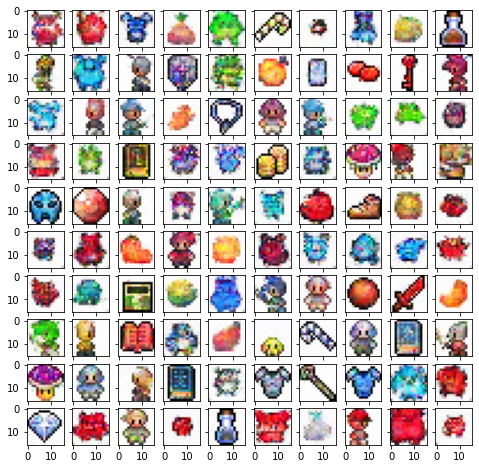

In [10]:
new_image = diffusion_model.sample(100)
fig, ax = plt.subplots(nrows=10, ncols=10,figsize=(8, 8), \
                        sharey=True, sharex=True)

new_images = np.transpose(new_image.to("cpu"), (0, 2, 3, 1))
for img, fig_x in zip(new_images, ax.flatten()):
    fig_x.imshow(img)
    fig_x.grid(False)

999it [03:53,  4.28it/s]


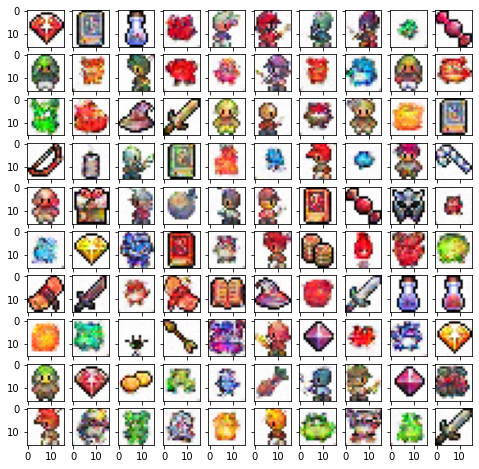

In [12]:
new_image = diffusion_model.sample(100, eta=0)
fig, ax = plt.subplots(nrows=10, ncols=10,figsize=(8, 8), \
                        sharey=True, sharex=True)

new_images = np.transpose(new_image.to("cpu"), (0, 2, 3, 1))
for img, fig_x in zip(new_images, ax.flatten()):
    fig_x.imshow(img)
    fig_x.grid(False)

In [ ]:
diffusion_model.save_model("classic_model.pt")

## DDPM predicting signal itself

In [ ]:
n_steps = 500

model = UNet(in_channels=3, out_channels=3, n_steps=n_steps).to(device)
diffusion_model = DiffusionModel(model, img_size=16, n_steps=n_steps, model_type=TargetType.X_START)
n_epochs = 500
diffusion_model.train(n_epochs, data_loader, len(dataset))

# best loss 0.135

  0%|          | 1/500 [00:01<13:48,  1.66s/it]

Loss at epoch 1: 0.633



  0%|          | 2/500 [00:02<07:44,  1.07it/s]

Loss at epoch 2: 0.411



  1%|          | 3/500 [00:02<05:39,  1.47it/s]

Loss at epoch 3: 0.367



  1%|          | 4/500 [00:02<04:43,  1.75it/s]

Loss at epoch 4: 0.345



  1%|          | 5/500 [00:03<04:17,  1.92it/s]

Loss at epoch 5: 0.334



  1%|          | 6/500 [00:03<03:58,  2.07it/s]

Loss at epoch 6: 0.318



  1%|▏         | 7/500 [00:04<03:46,  2.18it/s]

Loss at epoch 7: 0.308



  2%|▏         | 8/500 [00:04<03:37,  2.26it/s]

Loss at epoch 8: 0.306



  2%|▏         | 9/500 [00:04<03:35,  2.28it/s]

Loss at epoch 9: 0.288



  2%|▏         | 10/500 [00:05<03:36,  2.27it/s]

Loss at epoch 10: 0.282



  2%|▏         | 11/500 [00:05<03:33,  2.29it/s]

Loss at epoch 11: 0.278



  2%|▏         | 12/500 [00:06<03:32,  2.29it/s]

Loss at epoch 12: 0.265



  3%|▎         | 13/500 [00:06<03:27,  2.35it/s]

Loss at epoch 13: 0.266



  3%|▎         | 14/500 [00:07<03:22,  2.40it/s]

Loss at epoch 14: 0.266



  3%|▎         | 15/500 [00:07<03:19,  2.43it/s]

Loss at epoch 15: 0.256



  3%|▎         | 16/500 [00:07<03:17,  2.45it/s]

Loss at epoch 16: 0.255



  3%|▎         | 17/500 [00:08<03:14,  2.48it/s]

Loss at epoch 17: 0.247



  4%|▎         | 18/500 [00:08<03:13,  2.49it/s]

Loss at epoch 18: 0.251



  4%|▍         | 19/500 [00:09<03:11,  2.51it/s]

Loss at epoch 19: 0.249



  4%|▍         | 20/500 [00:09<03:12,  2.50it/s]

Loss at epoch 20: 0.250



  4%|▍         | 21/500 [00:09<03:11,  2.51it/s]

Loss at epoch 21: 0.244



  4%|▍         | 22/500 [00:10<03:08,  2.54it/s]

Loss at epoch 22: 0.249



  5%|▍         | 23/500 [00:10<03:09,  2.52it/s]

Loss at epoch 23: 0.236



  5%|▍         | 24/500 [00:11<03:11,  2.49it/s]

Loss at epoch 24: 0.237



  5%|▌         | 25/500 [00:11<03:12,  2.47it/s]

Loss at epoch 25: 0.238



  5%|▌         | 26/500 [00:11<03:10,  2.49it/s]

Loss at epoch 26: 0.235



  5%|▌         | 27/500 [00:12<03:08,  2.51it/s]

Loss at epoch 27: 0.232



  6%|▌         | 28/500 [00:12<03:06,  2.53it/s]

Loss at epoch 28: 0.225



  6%|▌         | 29/500 [00:13<03:06,  2.52it/s]

Loss at epoch 29: 0.227



  6%|▌         | 30/500 [00:13<03:04,  2.55it/s]

Loss at epoch 30: 0.227



  6%|▌         | 31/500 [00:13<03:05,  2.53it/s]

Loss at epoch 31: 0.231



  6%|▋         | 32/500 [00:14<03:03,  2.54it/s]

Loss at epoch 32: 0.230



  7%|▋         | 33/500 [00:14<03:03,  2.55it/s]

Loss at epoch 33: 0.222



  7%|▋         | 34/500 [00:14<03:01,  2.56it/s]

Loss at epoch 34: 0.221



  7%|▋         | 35/500 [00:15<03:01,  2.56it/s]

Loss at epoch 35: 0.225



  7%|▋         | 36/500 [00:15<03:08,  2.46it/s]

Loss at epoch 36: 0.216



  7%|▋         | 37/500 [00:16<03:07,  2.47it/s]

Loss at epoch 37: 0.215



  8%|▊         | 38/500 [00:16<03:06,  2.47it/s]

Loss at epoch 38: 0.220



  8%|▊         | 39/500 [00:17<03:16,  2.35it/s]

Loss at epoch 39: 0.221



  8%|▊         | 40/500 [00:17<03:20,  2.30it/s]

Loss at epoch 40: 0.218



  8%|▊         | 41/500 [00:17<03:20,  2.29it/s]

Loss at epoch 41: 0.216



  8%|▊         | 42/500 [00:18<03:16,  2.33it/s]

Loss at epoch 42: 0.212



  9%|▊         | 43/500 [00:18<03:12,  2.38it/s]

Loss at epoch 43: 0.216



  9%|▉         | 44/500 [00:19<03:08,  2.42it/s]

Loss at epoch 44: 0.220



  9%|▉         | 45/500 [00:19<03:06,  2.44it/s]

Loss at epoch 45: 0.213



  9%|▉         | 46/500 [00:20<03:05,  2.44it/s]

Loss at epoch 46: 0.222



  9%|▉         | 47/500 [00:20<03:02,  2.48it/s]

Loss at epoch 47: 0.214



 10%|▉         | 48/500 [00:20<03:01,  2.49it/s]

Loss at epoch 48: 0.211



 10%|▉         | 49/500 [00:21<03:00,  2.50it/s]

Loss at epoch 49: 0.207



 10%|█         | 50/500 [00:21<03:00,  2.50it/s]

Loss at epoch 50: 0.208



 10%|█         | 51/500 [00:21<03:00,  2.48it/s]

Loss at epoch 51: 0.209



 10%|█         | 52/500 [00:22<02:59,  2.50it/s]

Loss at epoch 52: 0.209



 11%|█         | 53/500 [00:22<03:01,  2.46it/s]

Loss at epoch 53: 0.213



 11%|█         | 54/500 [00:23<03:02,  2.44it/s]

Loss at epoch 54: 0.211



 11%|█         | 55/500 [00:23<03:01,  2.45it/s]

Loss at epoch 55: 0.198



 11%|█         | 56/500 [00:24<03:00,  2.47it/s]

Loss at epoch 56: 0.203



 11%|█▏        | 57/500 [00:24<02:57,  2.50it/s]

Loss at epoch 57: 0.210



 12%|█▏        | 58/500 [00:24<02:57,  2.49it/s]

Loss at epoch 58: 0.196



 12%|█▏        | 59/500 [00:25<03:02,  2.41it/s]

Loss at epoch 59: 0.201



 12%|█▏        | 60/500 [00:25<03:06,  2.36it/s]

Loss at epoch 60: 0.202



 12%|█▏        | 61/500 [00:26<03:08,  2.33it/s]

Loss at epoch 61: 0.196



 12%|█▏        | 62/500 [00:26<03:04,  2.37it/s]

Loss at epoch 62: 0.199



 13%|█▎        | 63/500 [00:26<03:03,  2.39it/s]

Loss at epoch 63: 0.197



 13%|█▎        | 64/500 [00:27<03:03,  2.38it/s]

Loss at epoch 64: 0.202



 13%|█▎        | 65/500 [00:27<03:01,  2.40it/s]

Loss at epoch 65: 0.197



 13%|█▎        | 66/500 [00:28<03:00,  2.41it/s]

Loss at epoch 66: 0.210



 13%|█▎        | 67/500 [00:28<03:02,  2.37it/s]

Loss at epoch 67: 0.192



 14%|█▎        | 68/500 [00:29<03:03,  2.35it/s]

Loss at epoch 68: 0.204



 14%|█▍        | 69/500 [00:29<03:04,  2.33it/s]

Loss at epoch 69: 0.206



 14%|█▍        | 70/500 [00:29<03:02,  2.36it/s]

Loss at epoch 70: 0.194



 14%|█▍        | 71/500 [00:30<03:01,  2.36it/s]

Loss at epoch 71: 0.203



 14%|█▍        | 72/500 [00:30<03:00,  2.37it/s]

Loss at epoch 72: 0.196



 15%|█▍        | 73/500 [00:31<02:59,  2.37it/s]

Loss at epoch 73: 0.194



 15%|█▍        | 74/500 [00:31<02:56,  2.42it/s]

Loss at epoch 74: 0.201



 15%|█▌        | 75/500 [00:31<02:53,  2.44it/s]

Loss at epoch 75: 0.193



 15%|█▌        | 76/500 [00:32<02:52,  2.46it/s]

Loss at epoch 76: 0.196



 15%|█▌        | 77/500 [00:32<02:55,  2.41it/s]

Loss at epoch 77: 0.198



 16%|█▌        | 78/500 [00:33<02:53,  2.43it/s]

Loss at epoch 78: 0.195



 16%|█▌        | 79/500 [00:33<02:52,  2.43it/s]

Loss at epoch 79: 0.193



 16%|█▌        | 80/500 [00:34<02:50,  2.47it/s]

Loss at epoch 80: 0.194



 16%|█▌        | 81/500 [00:34<02:49,  2.47it/s]

Loss at epoch 81: 0.199



 16%|█▋        | 82/500 [00:34<02:46,  2.50it/s]

Loss at epoch 82: 0.192



 17%|█▋        | 83/500 [00:35<02:47,  2.50it/s]

Loss at epoch 83: 0.196



 17%|█▋        | 84/500 [00:35<02:46,  2.49it/s]

Loss at epoch 84: 0.194



 17%|█▋        | 85/500 [00:36<02:46,  2.49it/s]

Loss at epoch 85: 0.209



 17%|█▋        | 86/500 [00:36<02:45,  2.51it/s]

Loss at epoch 86: 0.191



 17%|█▋        | 87/500 [00:36<03:01,  2.28it/s]

Loss at epoch 87: 0.191



 18%|█▊        | 88/500 [00:37<02:53,  2.37it/s]

Loss at epoch 88: 0.194



 18%|█▊        | 89/500 [00:37<02:51,  2.40it/s]

Loss at epoch 89: 0.191



 18%|█▊        | 90/500 [00:38<02:48,  2.43it/s]

Loss at epoch 90: 0.194



 18%|█▊        | 91/500 [00:38<02:46,  2.45it/s]

Loss at epoch 91: 0.191



 18%|█▊        | 92/500 [00:38<02:43,  2.49it/s]

Loss at epoch 92: 0.195



 19%|█▊        | 93/500 [00:39<02:44,  2.48it/s]

Loss at epoch 93: 0.196



 19%|█▉        | 94/500 [00:39<02:44,  2.47it/s]

Loss at epoch 94: 0.189



 19%|█▉        | 95/500 [00:40<02:44,  2.46it/s]

Loss at epoch 95: 0.193



 19%|█▉        | 96/500 [00:40<02:45,  2.44it/s]

Loss at epoch 96: 0.188



 19%|█▉        | 97/500 [00:40<02:45,  2.43it/s]

Loss at epoch 97: 0.191



 20%|█▉        | 98/500 [00:41<02:48,  2.38it/s]

Loss at epoch 98: 0.186



 20%|█▉        | 99/500 [00:41<02:45,  2.43it/s]

Loss at epoch 99: 0.193



 20%|██        | 100/500 [00:42<02:41,  2.48it/s]

Loss at epoch 100: 0.187



 20%|██        | 101/500 [00:42<02:38,  2.52it/s]

Loss at epoch 101: 0.185



 20%|██        | 102/500 [00:42<02:36,  2.54it/s]

Loss at epoch 102: 0.188



 21%|██        | 103/500 [00:43<02:38,  2.51it/s]

Loss at epoch 103: 0.185



 21%|██        | 104/500 [00:43<02:37,  2.51it/s]

Loss at epoch 104: 0.186



 21%|██        | 105/500 [00:44<02:35,  2.54it/s]

Loss at epoch 105: 0.185



 21%|██        | 106/500 [00:44<02:36,  2.52it/s]

Loss at epoch 106: 0.188



 21%|██▏       | 107/500 [00:44<02:36,  2.52it/s]

Loss at epoch 107: 0.186



 22%|██▏       | 108/500 [00:45<02:36,  2.50it/s]

Loss at epoch 108: 0.193



 22%|██▏       | 109/500 [00:45<02:34,  2.53it/s]

Loss at epoch 109: 0.181



 22%|██▏       | 110/500 [00:46<02:36,  2.50it/s]

Loss at epoch 110: 0.186



 22%|██▏       | 111/500 [00:46<02:35,  2.50it/s]

Loss at epoch 111: 0.188



 22%|██▏       | 112/500 [00:47<02:39,  2.43it/s]

Loss at epoch 112: 0.183



 23%|██▎       | 113/500 [00:47<02:38,  2.45it/s]

Loss at epoch 113: 0.187



 23%|██▎       | 114/500 [00:47<02:40,  2.41it/s]

Loss at epoch 114: 0.185



 23%|██▎       | 115/500 [00:48<02:42,  2.37it/s]

Loss at epoch 115: 0.188



 23%|██▎       | 116/500 [00:48<02:42,  2.36it/s]

Loss at epoch 116: 0.184



 23%|██▎       | 117/500 [00:49<02:42,  2.36it/s]

Loss at epoch 117: 0.190



 24%|██▎       | 118/500 [00:49<02:45,  2.30it/s]

Loss at epoch 118: 0.182



 24%|██▍       | 119/500 [00:50<02:49,  2.25it/s]

Loss at epoch 119: 0.185



 24%|██▍       | 120/500 [00:50<02:49,  2.25it/s]

Loss at epoch 120: 0.180



 24%|██▍       | 121/500 [00:50<02:47,  2.27it/s]

Loss at epoch 121: 0.189



 24%|██▍       | 122/500 [00:51<02:46,  2.27it/s]

Loss at epoch 122: 0.187



 25%|██▍       | 123/500 [00:51<02:44,  2.29it/s]

Loss at epoch 123: 0.186



 25%|██▍       | 124/500 [00:52<02:44,  2.29it/s]

Loss at epoch 124: 0.187



 25%|██▌       | 125/500 [00:52<02:43,  2.30it/s]

Loss at epoch 125: 0.184



 25%|██▌       | 126/500 [00:53<02:39,  2.35it/s]

Loss at epoch 126: 0.183



 25%|██▌       | 127/500 [00:53<02:40,  2.33it/s]

Loss at epoch 127: 0.186



 26%|██▌       | 128/500 [00:53<02:37,  2.36it/s]

Loss at epoch 128: 0.182



 26%|██▌       | 129/500 [00:54<02:37,  2.35it/s]

Loss at epoch 129: 0.177



 26%|██▌       | 130/500 [00:54<02:36,  2.36it/s]

Loss at epoch 130: 0.175



 26%|██▌       | 131/500 [00:55<02:34,  2.39it/s]

Loss at epoch 131: 0.180



 26%|██▋       | 132/500 [00:55<02:34,  2.39it/s]

Loss at epoch 132: 0.175



 27%|██▋       | 133/500 [00:56<02:34,  2.38it/s]

Loss at epoch 133: 0.174



 27%|██▋       | 134/500 [00:56<02:31,  2.42it/s]

Loss at epoch 134: 0.184



 27%|██▋       | 135/500 [00:56<02:32,  2.39it/s]

Loss at epoch 135: 0.181



 27%|██▋       | 136/500 [00:57<02:31,  2.41it/s]

Loss at epoch 136: 0.177



 27%|██▋       | 137/500 [00:57<02:29,  2.43it/s]

Loss at epoch 137: 0.180



 28%|██▊       | 138/500 [00:58<02:29,  2.43it/s]

Loss at epoch 138: 0.181



 28%|██▊       | 139/500 [00:58<02:27,  2.45it/s]

Loss at epoch 139: 0.177



 28%|██▊       | 140/500 [00:58<02:29,  2.41it/s]

Loss at epoch 140: 0.179



 28%|██▊       | 141/500 [00:59<02:26,  2.45it/s]

Loss at epoch 141: 0.180



 28%|██▊       | 142/500 [00:59<02:27,  2.43it/s]

Loss at epoch 142: 0.179



 29%|██▊       | 143/500 [01:00<02:28,  2.40it/s]

Loss at epoch 143: 0.180



 29%|██▉       | 144/500 [01:00<02:28,  2.39it/s]

Loss at epoch 144: 0.178



 29%|██▉       | 145/500 [01:00<02:27,  2.40it/s]

Loss at epoch 145: 0.172



 29%|██▉       | 146/500 [01:01<02:31,  2.33it/s]

Loss at epoch 146: 0.184



 29%|██▉       | 147/500 [01:01<02:29,  2.36it/s]

Loss at epoch 147: 0.174



 30%|██▉       | 148/500 [01:02<02:25,  2.42it/s]

Loss at epoch 148: 0.180



 30%|██▉       | 149/500 [01:02<02:25,  2.41it/s]

Loss at epoch 149: 0.179



 30%|███       | 150/500 [01:03<02:26,  2.40it/s]

Loss at epoch 150: 0.180



 30%|███       | 151/500 [01:03<02:24,  2.41it/s]

Loss at epoch 151: 0.178



 30%|███       | 152/500 [01:03<02:25,  2.39it/s]

Loss at epoch 152: 0.186



 31%|███       | 153/500 [01:04<02:22,  2.43it/s]

Loss at epoch 153: 0.178



 31%|███       | 154/500 [01:04<02:26,  2.36it/s]

Loss at epoch 154: 0.174



 31%|███       | 155/500 [01:05<02:22,  2.42it/s]

Loss at epoch 155: 0.177



 31%|███       | 156/500 [01:05<02:21,  2.43it/s]

Loss at epoch 156: 0.180



 31%|███▏      | 157/500 [01:06<02:25,  2.36it/s]

Loss at epoch 157: 0.172



 32%|███▏      | 158/500 [01:06<02:27,  2.32it/s]

Loss at epoch 158: 0.182



 32%|███▏      | 159/500 [01:06<02:26,  2.33it/s]

Loss at epoch 159: 0.168



 32%|███▏      | 160/500 [01:07<02:22,  2.38it/s]

Loss at epoch 160: 0.184



 32%|███▏      | 161/500 [01:07<02:22,  2.38it/s]

Loss at epoch 161: 0.177



 32%|███▏      | 162/500 [01:08<02:19,  2.42it/s]

Loss at epoch 162: 0.179



 33%|███▎      | 163/500 [01:08<02:18,  2.43it/s]

Loss at epoch 163: 0.178



 33%|███▎      | 164/500 [01:08<02:20,  2.40it/s]

Loss at epoch 164: 0.180



 33%|███▎      | 165/500 [01:09<02:18,  2.42it/s]

Loss at epoch 165: 0.179



 33%|███▎      | 166/500 [01:09<02:19,  2.40it/s]

Loss at epoch 166: 0.179



 33%|███▎      | 167/500 [01:10<02:18,  2.41it/s]

Loss at epoch 167: 0.181



 34%|███▎      | 168/500 [01:10<02:15,  2.46it/s]

Loss at epoch 168: 0.179



 34%|███▍      | 169/500 [01:11<02:17,  2.41it/s]

Loss at epoch 169: 0.174



 34%|███▍      | 170/500 [01:11<02:16,  2.43it/s]

Loss at epoch 170: 0.177



 34%|███▍      | 171/500 [01:11<02:16,  2.41it/s]

Loss at epoch 171: 0.179



 34%|███▍      | 172/500 [01:12<02:15,  2.42it/s]

Loss at epoch 172: 0.169



 35%|███▍      | 173/500 [01:12<02:13,  2.46it/s]

Loss at epoch 173: 0.173



 35%|███▍      | 174/500 [01:13<02:12,  2.46it/s]

Loss at epoch 174: 0.172



 35%|███▌      | 175/500 [01:13<02:11,  2.47it/s]

Loss at epoch 175: 0.173



 35%|███▌      | 176/500 [01:13<02:10,  2.48it/s]

Loss at epoch 176: 0.172



 35%|███▌      | 177/500 [01:14<02:11,  2.46it/s]

Loss at epoch 177: 0.175



 36%|███▌      | 178/500 [01:14<02:10,  2.46it/s]

Loss at epoch 178: 0.176



 36%|███▌      | 179/500 [01:15<02:13,  2.40it/s]

Loss at epoch 179: 0.172



 36%|███▌      | 180/500 [01:15<02:15,  2.36it/s]

Loss at epoch 180: 0.178



 36%|███▌      | 181/500 [01:15<02:14,  2.38it/s]

Loss at epoch 181: 0.182



 36%|███▋      | 182/500 [01:16<02:16,  2.33it/s]

Loss at epoch 182: 0.176



 37%|███▋      | 183/500 [01:16<02:20,  2.26it/s]

Loss at epoch 183: 0.174



 37%|███▋      | 184/500 [01:17<02:16,  2.31it/s]

Loss at epoch 184: 0.174



 37%|███▋      | 185/500 [01:17<02:18,  2.27it/s]

Loss at epoch 185: 0.172



 37%|███▋      | 186/500 [01:18<02:19,  2.24it/s]

Loss at epoch 186: 0.175



 37%|███▋      | 187/500 [01:18<02:22,  2.20it/s]

Loss at epoch 187: 0.172



 38%|███▊      | 188/500 [01:19<02:18,  2.26it/s]

Loss at epoch 188: 0.169



 38%|███▊      | 189/500 [01:19<02:13,  2.33it/s]

Loss at epoch 189: 0.172



 38%|███▊      | 190/500 [01:19<02:11,  2.36it/s]

Loss at epoch 190: 0.172



 38%|███▊      | 191/500 [01:20<02:08,  2.40it/s]

Loss at epoch 191: 0.172



 38%|███▊      | 192/500 [01:20<02:06,  2.44it/s]

Loss at epoch 192: 0.173



 39%|███▊      | 193/500 [01:21<02:04,  2.47it/s]

Loss at epoch 193: 0.169



 39%|███▉      | 194/500 [01:21<02:02,  2.50it/s]

Loss at epoch 194: 0.168



 39%|███▉      | 195/500 [01:21<02:05,  2.43it/s]

Loss at epoch 195: 0.176



 39%|███▉      | 196/500 [01:22<02:04,  2.45it/s]

Loss at epoch 196: 0.174



 39%|███▉      | 197/500 [01:22<02:02,  2.48it/s]

Loss at epoch 197: 0.177



 40%|███▉      | 198/500 [01:23<02:00,  2.51it/s]

Loss at epoch 198: 0.173



 40%|███▉      | 199/500 [01:23<01:58,  2.54it/s]

Loss at epoch 199: 0.173



 40%|████      | 200/500 [01:23<02:01,  2.47it/s]

Loss at epoch 200: 0.172



 40%|████      | 201/500 [01:24<02:02,  2.44it/s]

Loss at epoch 201: 0.173



 40%|████      | 202/500 [01:24<02:02,  2.43it/s]

Loss at epoch 202: 0.175



 41%|████      | 203/500 [01:25<02:02,  2.43it/s]

Loss at epoch 203: 0.171



 41%|████      | 204/500 [01:25<02:03,  2.39it/s]

Loss at epoch 204: 0.172



 41%|████      | 205/500 [01:25<02:01,  2.43it/s]

Loss at epoch 205: 0.171



 41%|████      | 206/500 [01:26<01:59,  2.47it/s]

Loss at epoch 206: 0.169



 41%|████▏     | 207/500 [01:26<02:01,  2.42it/s]

Loss at epoch 207: 0.172



 42%|████▏     | 208/500 [01:27<02:01,  2.41it/s]

Loss at epoch 208: 0.179



 42%|████▏     | 209/500 [01:27<02:01,  2.39it/s]

Loss at epoch 209: 0.174



 42%|████▏     | 210/500 [01:28<02:04,  2.33it/s]

Loss at epoch 210: 0.173



 42%|████▏     | 211/500 [01:28<02:02,  2.35it/s]

Loss at epoch 211: 0.179



 42%|████▏     | 212/500 [01:28<02:00,  2.39it/s]

Loss at epoch 212: 0.171



 43%|████▎     | 213/500 [01:29<01:58,  2.42it/s]

Loss at epoch 213: 0.173



 43%|████▎     | 214/500 [01:29<01:58,  2.41it/s]

Loss at epoch 214: 0.174



 43%|████▎     | 215/500 [01:30<01:59,  2.39it/s]

Loss at epoch 215: 0.170



 43%|████▎     | 216/500 [01:30<01:57,  2.41it/s]

Loss at epoch 216: 0.172



 43%|████▎     | 217/500 [01:30<01:56,  2.43it/s]

Loss at epoch 217: 0.169



 44%|████▎     | 218/500 [01:31<01:56,  2.43it/s]

Loss at epoch 218: 0.170



 44%|████▍     | 219/500 [01:31<01:55,  2.42it/s]

Loss at epoch 219: 0.170



 44%|████▍     | 220/500 [01:32<01:54,  2.45it/s]

Loss at epoch 220: 0.173



 44%|████▍     | 221/500 [01:32<01:54,  2.43it/s]

Loss at epoch 221: 0.164



 44%|████▍     | 222/500 [01:33<01:53,  2.46it/s]

Loss at epoch 222: 0.171



 45%|████▍     | 223/500 [01:33<01:53,  2.45it/s]

Loss at epoch 223: 0.167



 45%|████▍     | 224/500 [01:33<01:55,  2.40it/s]

Loss at epoch 224: 0.168



 45%|████▌     | 225/500 [01:34<01:54,  2.40it/s]

Loss at epoch 225: 0.171



 45%|████▌     | 226/500 [01:34<01:51,  2.46it/s]

Loss at epoch 226: 0.177



 45%|████▌     | 227/500 [01:35<01:50,  2.47it/s]

Loss at epoch 227: 0.173



 46%|████▌     | 228/500 [01:35<01:51,  2.45it/s]

Loss at epoch 228: 0.167



 46%|████▌     | 229/500 [01:35<01:49,  2.48it/s]

Loss at epoch 229: 0.169



 46%|████▌     | 230/500 [01:36<02:03,  2.19it/s]

Loss at epoch 230: 0.172



 46%|████▌     | 231/500 [01:36<02:00,  2.24it/s]

Loss at epoch 231: 0.167



 46%|████▋     | 232/500 [01:37<01:59,  2.24it/s]

Loss at epoch 232: 0.178



 47%|████▋     | 233/500 [01:37<01:58,  2.24it/s]

Loss at epoch 233: 0.171



 47%|████▋     | 234/500 [01:38<01:55,  2.31it/s]

Loss at epoch 234: 0.166



 47%|████▋     | 235/500 [01:38<01:54,  2.31it/s]

Loss at epoch 235: 0.171



 47%|████▋     | 236/500 [01:39<01:54,  2.30it/s]

Loss at epoch 236: 0.165



 47%|████▋     | 237/500 [01:39<01:54,  2.29it/s]

Loss at epoch 237: 0.172



 48%|████▊     | 238/500 [01:39<01:55,  2.28it/s]

Loss at epoch 238: 0.174



 48%|████▊     | 239/500 [01:40<01:51,  2.34it/s]

Loss at epoch 239: 0.159



 48%|████▊     | 240/500 [01:40<01:49,  2.38it/s]

Loss at epoch 240: 0.171



 48%|████▊     | 241/500 [01:41<01:47,  2.42it/s]

Loss at epoch 241: 0.171



 48%|████▊     | 242/500 [01:41<01:46,  2.43it/s]

Loss at epoch 242: 0.171



 49%|████▊     | 243/500 [01:41<01:46,  2.41it/s]

Loss at epoch 243: 0.171



 49%|████▉     | 244/500 [01:42<01:44,  2.45it/s]

Loss at epoch 244: 0.173



 49%|████▉     | 245/500 [01:42<01:45,  2.42it/s]

Loss at epoch 245: 0.173



 49%|████▉     | 246/500 [01:43<01:43,  2.44it/s]

Loss at epoch 246: 0.168



 49%|████▉     | 247/500 [01:43<01:43,  2.44it/s]

Loss at epoch 247: 0.174



 50%|████▉     | 248/500 [01:43<01:42,  2.46it/s]

Loss at epoch 248: 0.166



 50%|████▉     | 249/500 [01:44<01:42,  2.44it/s]

Loss at epoch 249: 0.165



 50%|█████     | 250/500 [01:44<01:40,  2.48it/s]

Loss at epoch 250: 0.167



 50%|█████     | 251/500 [01:45<01:40,  2.48it/s]

Loss at epoch 251: 0.165



 50%|█████     | 252/500 [01:45<01:40,  2.46it/s]

Loss at epoch 252: 0.171



 51%|█████     | 253/500 [01:46<01:40,  2.46it/s]

Loss at epoch 253: 0.163



 51%|█████     | 254/500 [01:46<01:39,  2.48it/s]

Loss at epoch 254: 0.167



 51%|█████     | 255/500 [01:46<01:39,  2.47it/s]

Loss at epoch 255: 0.167



 51%|█████     | 256/500 [01:47<01:37,  2.49it/s]

Loss at epoch 256: 0.170



 51%|█████▏    | 257/500 [01:47<01:37,  2.49it/s]

Loss at epoch 257: 0.174



 52%|█████▏    | 258/500 [01:48<01:37,  2.47it/s]

Loss at epoch 258: 0.166



 52%|█████▏    | 259/500 [01:48<01:39,  2.42it/s]

Loss at epoch 259: 0.167



 52%|█████▏    | 260/500 [01:48<01:38,  2.43it/s]

Loss at epoch 260: 0.173



 52%|█████▏    | 261/500 [01:49<01:38,  2.44it/s]

Loss at epoch 261: 0.170



 52%|█████▏    | 262/500 [01:49<01:37,  2.43it/s]

Loss at epoch 262: 0.167



 53%|█████▎    | 263/500 [01:50<01:40,  2.36it/s]

Loss at epoch 263: 0.167



 53%|█████▎    | 264/500 [01:50<01:40,  2.35it/s]

Loss at epoch 264: 0.167



 53%|█████▎    | 265/500 [01:51<01:40,  2.34it/s]

Loss at epoch 265: 0.168



 53%|█████▎    | 266/500 [01:51<01:41,  2.32it/s]

Loss at epoch 266: 0.166



 53%|█████▎    | 267/500 [01:51<01:41,  2.30it/s]

Loss at epoch 267: 0.167



 54%|█████▎    | 268/500 [01:52<01:38,  2.36it/s]

Loss at epoch 268: 0.159



 54%|█████▍    | 269/500 [01:52<01:36,  2.39it/s]

Loss at epoch 269: 0.166



 54%|█████▍    | 270/500 [01:53<01:34,  2.42it/s]

Loss at epoch 270: 0.175



 54%|█████▍    | 271/500 [01:53<01:34,  2.42it/s]

Loss at epoch 271: 0.173



 54%|█████▍    | 272/500 [01:53<01:35,  2.39it/s]

Loss at epoch 272: 0.169



 55%|█████▍    | 273/500 [01:54<01:34,  2.40it/s]

Loss at epoch 273: 0.167



 55%|█████▍    | 274/500 [01:54<01:33,  2.43it/s]

Loss at epoch 274: 0.163



 55%|█████▌    | 275/500 [01:55<01:32,  2.44it/s]

Loss at epoch 275: 0.177



 55%|█████▌    | 276/500 [01:55<01:31,  2.44it/s]

Loss at epoch 276: 0.169



 55%|█████▌    | 277/500 [01:56<01:33,  2.39it/s]

Loss at epoch 277: 0.174



 56%|█████▌    | 278/500 [01:56<01:31,  2.41it/s]

Loss at epoch 278: 0.159



 56%|█████▌    | 279/500 [01:56<01:32,  2.38it/s]

Loss at epoch 279: 0.162



 56%|█████▌    | 280/500 [01:57<01:31,  2.40it/s]

Loss at epoch 280: 0.176



 56%|█████▌    | 281/500 [01:57<01:30,  2.41it/s]

Loss at epoch 281: 0.170



 56%|█████▋    | 282/500 [01:58<01:29,  2.43it/s]

Loss at epoch 282: 0.170



 57%|█████▋    | 283/500 [01:58<01:27,  2.47it/s]

Loss at epoch 283: 0.170



 57%|█████▋    | 284/500 [01:58<01:27,  2.46it/s]

Loss at epoch 284: 0.166



 57%|█████▋    | 285/500 [01:59<01:28,  2.44it/s]

Loss at epoch 285: 0.164



 57%|█████▋    | 286/500 [01:59<01:27,  2.45it/s]

Loss at epoch 286: 0.167



 57%|█████▋    | 287/500 [02:00<01:26,  2.47it/s]

Loss at epoch 287: 0.162



 58%|█████▊    | 288/500 [02:00<01:25,  2.48it/s]

Loss at epoch 288: 0.171



 58%|█████▊    | 289/500 [02:00<01:25,  2.45it/s]

Loss at epoch 289: 0.169



 58%|█████▊    | 290/500 [02:01<01:26,  2.44it/s]

Loss at epoch 290: 0.167



 58%|█████▊    | 291/500 [02:01<01:27,  2.39it/s]

Loss at epoch 291: 0.168



 58%|█████▊    | 292/500 [02:02<01:27,  2.38it/s]

Loss at epoch 292: 0.164



 59%|█████▊    | 293/500 [02:02<01:26,  2.39it/s]

Loss at epoch 293: 0.160



 59%|█████▉    | 294/500 [02:03<01:26,  2.38it/s]

Loss at epoch 294: 0.168



 59%|█████▉    | 295/500 [02:03<01:26,  2.37it/s]

Loss at epoch 295: 0.162



 59%|█████▉    | 296/500 [02:03<01:25,  2.38it/s]

Loss at epoch 296: 0.165



 59%|█████▉    | 297/500 [02:04<01:25,  2.38it/s]

Loss at epoch 297: 0.171



 60%|█████▉    | 298/500 [02:04<01:23,  2.43it/s]

Loss at epoch 298: 0.169



 60%|█████▉    | 299/500 [02:05<01:23,  2.40it/s]

Loss at epoch 299: 0.160



 60%|██████    | 300/500 [02:05<01:22,  2.42it/s]

Loss at epoch 300: 0.162



 60%|██████    | 301/500 [02:05<01:24,  2.37it/s]

Loss at epoch 301: 0.170



 60%|██████    | 302/500 [02:06<01:22,  2.40it/s]

Loss at epoch 302: 0.169



 61%|██████    | 303/500 [02:06<01:21,  2.41it/s]

Loss at epoch 303: 0.168



 61%|██████    | 304/500 [02:07<01:22,  2.39it/s]

Loss at epoch 304: 0.170



 61%|██████    | 305/500 [02:07<01:19,  2.44it/s]

Loss at epoch 305: 0.163



 61%|██████    | 306/500 [02:08<01:22,  2.36it/s]

Loss at epoch 306: 0.156



 61%|██████▏   | 307/500 [02:08<01:21,  2.36it/s]

Loss at epoch 307: 0.162



 62%|██████▏   | 308/500 [02:08<01:21,  2.35it/s]

Loss at epoch 308: 0.169



 62%|██████▏   | 309/500 [02:09<01:21,  2.34it/s]

Loss at epoch 309: 0.162



 62%|██████▏   | 310/500 [02:09<01:19,  2.38it/s]

Loss at epoch 310: 0.174



 62%|██████▏   | 311/500 [02:10<01:19,  2.38it/s]

Loss at epoch 311: 0.168



 62%|██████▏   | 312/500 [02:10<01:17,  2.41it/s]

Loss at epoch 312: 0.160



 63%|██████▎   | 313/500 [02:10<01:17,  2.43it/s]

Loss at epoch 313: 0.165



 63%|██████▎   | 314/500 [02:11<01:18,  2.38it/s]

Loss at epoch 314: 0.166



 63%|██████▎   | 315/500 [02:11<01:17,  2.37it/s]

Loss at epoch 315: 0.169



 63%|██████▎   | 316/500 [02:12<01:17,  2.38it/s]

Loss at epoch 316: 0.162



 63%|██████▎   | 317/500 [02:12<01:15,  2.44it/s]

Loss at epoch 317: 0.171



 64%|██████▎   | 318/500 [02:13<01:14,  2.45it/s]

Loss at epoch 318: 0.165



 64%|██████▍   | 319/500 [02:13<01:14,  2.44it/s]

Loss at epoch 319: 0.174



 64%|██████▍   | 320/500 [02:13<01:14,  2.43it/s]

Loss at epoch 320: 0.161



 64%|██████▍   | 321/500 [02:14<01:16,  2.35it/s]

Loss at epoch 321: 0.162



 64%|██████▍   | 322/500 [02:14<01:16,  2.33it/s]

Loss at epoch 322: 0.172



 65%|██████▍   | 323/500 [02:15<01:16,  2.32it/s]

Loss at epoch 323: 0.172



 65%|██████▍   | 324/500 [02:15<01:14,  2.35it/s]

Loss at epoch 324: 0.163



 65%|██████▌   | 325/500 [02:16<01:14,  2.34it/s]

Loss at epoch 325: 0.167



 65%|██████▌   | 326/500 [02:16<01:13,  2.37it/s]

Loss at epoch 326: 0.165



 65%|██████▌   | 327/500 [02:16<01:11,  2.42it/s]

Loss at epoch 327: 0.163



 66%|██████▌   | 328/500 [02:17<01:11,  2.41it/s]

Loss at epoch 328: 0.161



 66%|██████▌   | 329/500 [02:17<01:10,  2.41it/s]

Loss at epoch 329: 0.169



 66%|██████▌   | 330/500 [02:18<01:09,  2.43it/s]

Loss at epoch 330: 0.158



 66%|██████▌   | 331/500 [02:18<01:08,  2.48it/s]

Loss at epoch 331: 0.169



 66%|██████▋   | 332/500 [02:18<01:08,  2.45it/s]

Loss at epoch 332: 0.162



 67%|██████▋   | 333/500 [02:19<01:07,  2.47it/s]

Loss at epoch 333: 0.169



 67%|██████▋   | 334/500 [02:19<01:07,  2.46it/s]

Loss at epoch 334: 0.159



 67%|██████▋   | 335/500 [02:20<01:07,  2.46it/s]

Loss at epoch 335: 0.164



 67%|██████▋   | 336/500 [02:20<01:06,  2.45it/s]

Loss at epoch 336: 0.164



 67%|██████▋   | 337/500 [02:20<01:06,  2.47it/s]

Loss at epoch 337: 0.171



 68%|██████▊   | 338/500 [02:21<01:05,  2.49it/s]

Loss at epoch 338: 0.168



 68%|██████▊   | 339/500 [02:21<01:05,  2.47it/s]

Loss at epoch 339: 0.179



 68%|██████▊   | 340/500 [02:22<01:05,  2.43it/s]

Loss at epoch 340: 0.172



 68%|██████▊   | 341/500 [02:22<01:04,  2.46it/s]

Loss at epoch 341: 0.171



 68%|██████▊   | 342/500 [02:22<01:04,  2.46it/s]

Loss at epoch 342: 0.163



 69%|██████▊   | 343/500 [02:23<01:03,  2.47it/s]

Loss at epoch 343: 0.166



 69%|██████▉   | 344/500 [02:23<01:03,  2.46it/s]

Loss at epoch 344: 0.168



 69%|██████▉   | 345/500 [02:24<01:02,  2.47it/s]

Loss at epoch 345: 0.168



 69%|██████▉   | 346/500 [02:24<01:02,  2.47it/s]

Loss at epoch 346: 0.171



 69%|██████▉   | 347/500 [02:24<01:02,  2.45it/s]

Loss at epoch 347: 0.164



 70%|██████▉   | 348/500 [02:25<01:04,  2.36it/s]

Loss at epoch 348: 0.159



 70%|██████▉   | 349/500 [02:25<01:07,  2.25it/s]

Loss at epoch 349: 0.165



 70%|███████   | 350/500 [02:26<01:05,  2.29it/s]

Loss at epoch 350: 0.171



 70%|███████   | 351/500 [02:26<01:04,  2.31it/s]

Loss at epoch 351: 0.160



 70%|███████   | 352/500 [02:27<01:02,  2.35it/s]

Loss at epoch 352: 0.165



 71%|███████   | 353/500 [02:27<01:01,  2.40it/s]

Loss at epoch 353: 0.171



 71%|███████   | 354/500 [02:27<01:00,  2.43it/s]

Loss at epoch 354: 0.168



 71%|███████   | 355/500 [02:28<01:00,  2.41it/s]

Loss at epoch 355: 0.166



 71%|███████   | 356/500 [02:28<01:00,  2.39it/s]

Loss at epoch 356: 0.171



 71%|███████▏  | 357/500 [02:29<00:59,  2.42it/s]

Loss at epoch 357: 0.164



 72%|███████▏  | 358/500 [02:29<00:59,  2.41it/s]

Loss at epoch 358: 0.167



 72%|███████▏  | 359/500 [02:30<00:59,  2.37it/s]

Loss at epoch 359: 0.172



 72%|███████▏  | 360/500 [02:30<00:58,  2.40it/s]

Loss at epoch 360: 0.161



 72%|███████▏  | 361/500 [02:30<00:57,  2.41it/s]

Loss at epoch 361: 0.156



 72%|███████▏  | 362/500 [02:31<00:57,  2.40it/s]

Loss at epoch 362: 0.171



 73%|███████▎  | 363/500 [02:31<00:56,  2.41it/s]

Loss at epoch 363: 0.165



 73%|███████▎  | 364/500 [02:32<00:56,  2.40it/s]

Loss at epoch 364: 0.165



 73%|███████▎  | 365/500 [02:32<00:55,  2.42it/s]

Loss at epoch 365: 0.174



 73%|███████▎  | 366/500 [02:32<00:54,  2.45it/s]

Loss at epoch 366: 0.158



 73%|███████▎  | 367/500 [02:33<00:54,  2.46it/s]

Loss at epoch 367: 0.163



 74%|███████▎  | 368/500 [02:33<00:53,  2.46it/s]

Loss at epoch 368: 0.168



 74%|███████▍  | 369/500 [02:34<00:53,  2.46it/s]

Loss at epoch 369: 0.166



 74%|███████▍  | 370/500 [02:34<00:53,  2.43it/s]

Loss at epoch 370: 0.170



 74%|███████▍  | 371/500 [02:35<00:53,  2.42it/s]

Loss at epoch 371: 0.163



 74%|███████▍  | 372/500 [02:35<00:57,  2.22it/s]

Loss at epoch 372: 0.162



 75%|███████▍  | 373/500 [02:35<00:55,  2.27it/s]

Loss at epoch 373: 0.160



 75%|███████▍  | 374/500 [02:36<00:54,  2.30it/s]

Loss at epoch 374: 0.165



 75%|███████▌  | 375/500 [02:36<00:54,  2.31it/s]

Loss at epoch 375: 0.163



 75%|███████▌  | 376/500 [02:37<00:54,  2.29it/s]

Loss at epoch 376: 0.167



 75%|███████▌  | 377/500 [02:37<00:52,  2.32it/s]

Loss at epoch 377: 0.162



 76%|███████▌  | 378/500 [02:38<00:51,  2.38it/s]

Loss at epoch 378: 0.166



 76%|███████▌  | 379/500 [02:38<00:51,  2.33it/s]

Loss at epoch 379: 0.167



 76%|███████▌  | 380/500 [02:38<00:51,  2.32it/s]

Loss at epoch 380: 0.164



 76%|███████▌  | 381/500 [02:39<00:50,  2.34it/s]

Loss at epoch 381: 0.162



 76%|███████▋  | 382/500 [02:39<00:50,  2.34it/s]

Loss at epoch 382: 0.161



 77%|███████▋  | 383/500 [02:40<00:49,  2.37it/s]

Loss at epoch 383: 0.170



 77%|███████▋  | 384/500 [02:40<00:47,  2.42it/s]

Loss at epoch 384: 0.170



 77%|███████▋  | 385/500 [02:40<00:46,  2.45it/s]

Loss at epoch 385: 0.158



 77%|███████▋  | 386/500 [02:41<00:47,  2.40it/s]

Loss at epoch 386: 0.170



 77%|███████▋  | 387/500 [02:41<00:46,  2.41it/s]

Loss at epoch 387: 0.163



 78%|███████▊  | 388/500 [02:42<00:46,  2.43it/s]

Loss at epoch 388: 0.157



 78%|███████▊  | 389/500 [02:42<00:45,  2.45it/s]

Loss at epoch 389: 0.169



 78%|███████▊  | 390/500 [02:43<00:44,  2.46it/s]

Loss at epoch 390: 0.163



 78%|███████▊  | 391/500 [02:43<00:44,  2.48it/s]

Loss at epoch 391: 0.163



 78%|███████▊  | 392/500 [02:43<00:43,  2.47it/s]

Loss at epoch 392: 0.161



 79%|███████▊  | 393/500 [02:44<00:43,  2.46it/s]

Loss at epoch 393: 0.167



 79%|███████▉  | 394/500 [02:44<00:43,  2.44it/s]

Loss at epoch 394: 0.159



 79%|███████▉  | 395/500 [02:45<00:43,  2.43it/s]

Loss at epoch 395: 0.159



 79%|███████▉  | 396/500 [02:45<00:43,  2.39it/s]

Loss at epoch 396: 0.168



 79%|███████▉  | 397/500 [02:45<00:43,  2.35it/s]

Loss at epoch 397: 0.166



 80%|███████▉  | 398/500 [02:46<00:44,  2.31it/s]

Loss at epoch 398: 0.158



 80%|███████▉  | 399/500 [02:46<00:42,  2.36it/s]

Loss at epoch 399: 0.162



 80%|████████  | 400/500 [02:47<00:41,  2.40it/s]

Loss at epoch 400: 0.161



 80%|████████  | 401/500 [02:47<00:41,  2.38it/s]

Loss at epoch 401: 0.164



 80%|████████  | 402/500 [02:48<00:40,  2.40it/s]

Loss at epoch 402: 0.168



 81%|████████  | 403/500 [02:48<00:39,  2.44it/s]

Loss at epoch 403: 0.163



 81%|████████  | 404/500 [02:48<00:39,  2.41it/s]

Loss at epoch 404: 0.165



 81%|████████  | 405/500 [02:49<00:39,  2.38it/s]

Loss at epoch 405: 0.162



 81%|████████  | 406/500 [02:49<00:39,  2.35it/s]

Loss at epoch 406: 0.161



 81%|████████▏ | 407/500 [02:50<00:40,  2.32it/s]

Loss at epoch 407: 0.169



 82%|████████▏ | 408/500 [02:50<00:39,  2.34it/s]

Loss at epoch 408: 0.163



 82%|████████▏ | 409/500 [02:51<00:38,  2.37it/s]

Loss at epoch 409: 0.166



 82%|████████▏ | 410/500 [02:51<00:37,  2.37it/s]

Loss at epoch 410: 0.167



 82%|████████▏ | 411/500 [02:51<00:36,  2.42it/s]

Loss at epoch 411: 0.167



 82%|████████▏ | 412/500 [02:52<00:35,  2.47it/s]

Loss at epoch 412: 0.170



 83%|████████▎ | 413/500 [02:52<00:35,  2.45it/s]

Loss at epoch 413: 0.169



 83%|████████▎ | 414/500 [02:53<00:35,  2.43it/s]

Loss at epoch 414: 0.162



 83%|████████▎ | 415/500 [02:53<00:34,  2.45it/s]

Loss at epoch 415: 0.164



 83%|████████▎ | 416/500 [02:53<00:34,  2.41it/s]

Loss at epoch 416: 0.160



 83%|████████▎ | 417/500 [02:54<00:34,  2.42it/s]

Loss at epoch 417: 0.157



 84%|████████▎ | 418/500 [02:54<00:34,  2.39it/s]

Loss at epoch 418: 0.163



 84%|████████▍ | 419/500 [02:55<00:33,  2.40it/s]

Loss at epoch 419: 0.166



 84%|████████▍ | 420/500 [02:55<00:32,  2.44it/s]

Loss at epoch 420: 0.160



 84%|████████▍ | 421/500 [02:55<00:32,  2.41it/s]

Loss at epoch 421: 0.164



 84%|████████▍ | 422/500 [02:56<00:32,  2.43it/s]

Loss at epoch 422: 0.163



 85%|████████▍ | 423/500 [02:56<00:32,  2.40it/s]

Loss at epoch 423: 0.167



 85%|████████▍ | 424/500 [02:57<00:31,  2.42it/s]

Loss at epoch 424: 0.165



 85%|████████▌ | 425/500 [02:57<00:31,  2.40it/s]

Loss at epoch 425: 0.162



 85%|████████▌ | 426/500 [02:58<00:30,  2.41it/s]

Loss at epoch 426: 0.165



 85%|████████▌ | 427/500 [02:58<00:29,  2.45it/s]

Loss at epoch 427: 0.161



 86%|████████▌ | 428/500 [02:58<00:29,  2.44it/s]

Loss at epoch 428: 0.160



 86%|████████▌ | 429/500 [02:59<00:29,  2.44it/s]

Loss at epoch 429: 0.157



 86%|████████▌ | 430/500 [02:59<00:28,  2.42it/s]

Loss at epoch 430: 0.159



 86%|████████▌ | 431/500 [03:00<00:28,  2.43it/s]

Loss at epoch 431: 0.169



 86%|████████▋ | 432/500 [03:00<00:28,  2.42it/s]

Loss at epoch 432: 0.160



 87%|████████▋ | 433/500 [03:00<00:27,  2.41it/s]

Loss at epoch 433: 0.171



 87%|████████▋ | 434/500 [03:01<00:27,  2.36it/s]

Loss at epoch 434: 0.171



 87%|████████▋ | 435/500 [03:01<00:27,  2.37it/s]

Loss at epoch 435: 0.167



 87%|████████▋ | 436/500 [03:02<00:27,  2.35it/s]

Loss at epoch 436: 0.161



 87%|████████▋ | 437/500 [03:02<00:26,  2.35it/s]

Loss at epoch 437: 0.163



 88%|████████▊ | 438/500 [03:03<00:25,  2.39it/s]

Loss at epoch 438: 0.168



 88%|████████▊ | 439/500 [03:03<00:25,  2.40it/s]

Loss at epoch 439: 0.163



 88%|████████▊ | 440/500 [03:03<00:25,  2.38it/s]

Loss at epoch 440: 0.168



 88%|████████▊ | 441/500 [03:04<00:24,  2.38it/s]

Loss at epoch 441: 0.166



 88%|████████▊ | 442/500 [03:04<00:24,  2.41it/s]

Loss at epoch 442: 0.166



 89%|████████▊ | 443/500 [03:05<00:23,  2.41it/s]

Loss at epoch 443: 0.157



 89%|████████▉ | 444/500 [03:05<00:23,  2.42it/s]

Loss at epoch 444: 0.163



 89%|████████▉ | 445/500 [03:05<00:22,  2.39it/s]

Loss at epoch 445: 0.169



 89%|████████▉ | 446/500 [03:06<00:22,  2.42it/s]

Loss at epoch 446: 0.170



 89%|████████▉ | 447/500 [03:06<00:21,  2.44it/s]

Loss at epoch 447: 0.160



 90%|████████▉ | 448/500 [03:07<00:21,  2.46it/s]

Loss at epoch 448: 0.160



 90%|████████▉ | 449/500 [03:07<00:20,  2.48it/s]

Loss at epoch 449: 0.158



 90%|█████████ | 450/500 [03:07<00:20,  2.44it/s]

Loss at epoch 450: 0.173



 90%|█████████ | 451/500 [03:08<00:19,  2.47it/s]

Loss at epoch 451: 0.166



 90%|█████████ | 452/500 [03:08<00:19,  2.48it/s]

Loss at epoch 452: 0.162



 91%|█████████ | 453/500 [03:09<00:18,  2.48it/s]

Loss at epoch 453: 0.160



 91%|█████████ | 454/500 [03:09<00:18,  2.44it/s]

Loss at epoch 454: 0.168



 91%|█████████ | 455/500 [03:10<00:18,  2.39it/s]

Loss at epoch 455: 0.167



 91%|█████████ | 456/500 [03:10<00:18,  2.42it/s]

Loss at epoch 456: 0.165



 91%|█████████▏| 457/500 [03:10<00:17,  2.44it/s]

Loss at epoch 457: 0.162



 92%|█████████▏| 458/500 [03:11<00:17,  2.45it/s]

Loss at epoch 458: 0.162



 92%|█████████▏| 459/500 [03:11<00:16,  2.44it/s]

Loss at epoch 459: 0.166



 92%|█████████▏| 460/500 [03:12<00:16,  2.45it/s]

Loss at epoch 460: 0.165



 92%|█████████▏| 461/500 [03:12<00:16,  2.39it/s]

Loss at epoch 461: 0.165



 92%|█████████▏| 462/500 [03:12<00:16,  2.37it/s]

Loss at epoch 462: 0.165



 93%|█████████▎| 463/500 [03:13<00:15,  2.38it/s]

Loss at epoch 463: 0.163



 93%|█████████▎| 464/500 [03:13<00:15,  2.35it/s]

Loss at epoch 464: 0.160



 93%|█████████▎| 465/500 [03:14<00:15,  2.33it/s]

Loss at epoch 465: 0.167



 93%|█████████▎| 466/500 [03:14<00:14,  2.34it/s]

Loss at epoch 466: 0.166



 93%|█████████▎| 467/500 [03:15<00:13,  2.37it/s]

Loss at epoch 467: 0.160



 94%|█████████▎| 468/500 [03:15<00:13,  2.39it/s]

Loss at epoch 468: 0.164



 94%|█████████▍| 469/500 [03:15<00:13,  2.38it/s]

Loss at epoch 469: 0.168



 94%|█████████▍| 470/500 [03:16<00:12,  2.40it/s]

Loss at epoch 470: 0.165



 94%|█████████▍| 471/500 [03:16<00:11,  2.44it/s]

Loss at epoch 471: 0.167



 94%|█████████▍| 472/500 [03:17<00:11,  2.46it/s]

Loss at epoch 472: 0.165



 95%|█████████▍| 473/500 [03:17<00:10,  2.46it/s]

Loss at epoch 473: 0.161



 95%|█████████▍| 474/500 [03:17<00:10,  2.44it/s]

Loss at epoch 474: 0.163



 95%|█████████▌| 475/500 [03:18<00:10,  2.43it/s]

Loss at epoch 475: 0.160



 95%|█████████▌| 476/500 [03:18<00:09,  2.45it/s]

Loss at epoch 476: 0.161



 95%|█████████▌| 477/500 [03:19<00:09,  2.46it/s]

Loss at epoch 477: 0.162



 96%|█████████▌| 478/500 [03:19<00:09,  2.42it/s]

Loss at epoch 478: 0.166



 96%|█████████▌| 479/500 [03:20<00:08,  2.40it/s]

Loss at epoch 479: 0.163



 96%|█████████▌| 480/500 [03:20<00:08,  2.43it/s]

Loss at epoch 480: 0.171



 96%|█████████▌| 481/500 [03:20<00:07,  2.43it/s]

Loss at epoch 481: 0.162



 96%|█████████▋| 482/500 [03:21<00:07,  2.42it/s]

Loss at epoch 482: 0.161



 97%|█████████▋| 483/500 [03:21<00:06,  2.45it/s]

Loss at epoch 483: 0.165



 97%|█████████▋| 484/500 [03:22<00:06,  2.46it/s]

Loss at epoch 484: 0.152



 97%|█████████▋| 485/500 [03:22<00:06,  2.47it/s]

Loss at epoch 485: 0.165



 97%|█████████▋| 486/500 [03:22<00:05,  2.39it/s]

Loss at epoch 486: 0.165



 97%|█████████▋| 487/500 [03:23<00:05,  2.39it/s]

Loss at epoch 487: 0.161



 98%|█████████▊| 488/500 [03:23<00:05,  2.40it/s]

Loss at epoch 488: 0.162



 98%|█████████▊| 489/500 [03:24<00:04,  2.37it/s]

Loss at epoch 489: 0.162



 98%|█████████▊| 490/500 [03:24<00:04,  2.37it/s]

Loss at epoch 490: 0.157



 98%|█████████▊| 491/500 [03:25<00:03,  2.32it/s]

Loss at epoch 491: 0.164



 98%|█████████▊| 492/500 [03:25<00:03,  2.28it/s]

Loss at epoch 492: 0.167



 99%|█████████▊| 493/500 [03:25<00:03,  2.30it/s]

Loss at epoch 493: 0.169



 99%|█████████▉| 494/500 [03:26<00:02,  2.37it/s]

Loss at epoch 494: 0.168



 99%|█████████▉| 495/500 [03:26<00:02,  2.38it/s]

Loss at epoch 495: 0.158



 99%|█████████▉| 496/500 [03:27<00:01,  2.36it/s]

Loss at epoch 496: 0.157



 99%|█████████▉| 497/500 [03:27<00:01,  2.35it/s]

Loss at epoch 497: 0.164



100%|█████████▉| 498/500 [03:27<00:00,  2.37it/s]

Loss at epoch 498: 0.153



100%|█████████▉| 499/500 [03:28<00:00,  2.40it/s]

Loss at epoch 499: 0.165



100%|██████████| 500/500 [03:28<00:00,  2.39it/s]

Loss at epoch 500: 0.159


[0.6331195494854491,
 0.41083793980734695,
 0.3670021111403054,
 0.344531990129081,
 0.3336340588421218,
 0.3177144016884484,
 0.30760798657812727,
 0.30592790104094003,
 0.288285195481348,
 0.28164015674009557,
 0.27836007146331354,
 0.2647162768275896,
 0.26567457704593905,
 0.2657975662806862,
 0.25591368113106827,
 0.25522737802113393,
 0.24656611544260718,
 0.25074195089932794,
 0.24932579344850245,
 0.2501360287372797,
 0.24351325662293916,
 0.2491474167187455,
 0.2361961072018753,
 0.23651569197332956,
 0.23777347576396668,
 0.23512977096884927,
 0.2318819377757393,
 0.22549894209799726,
 0.2268364140969397,
 0.22666572565677964,
 0.23080382607747457,
 0.23010635889988743,
 0.22202644847618994,
 0.22129429265874048,
 0.2249826491398263,
 0.21644694213598586,
 0.21461712376027434,
 0.2200991122634015,
 0.2213171126708198,
 0.2178487041651441,
 0.21635009699720675,
 0.2119196205812049,
 0.21602530931484965,
 0.2196370462057344,
 0.21306553564351333,
 0.22198457299416904,
 0.213853

In [15]:
n_steps = 500
model = UNet(in_channels=3, out_channels=3, n_steps=n_steps).to(device)
diffusion_model = DiffusionModel(model, img_size=16, n_steps=n_steps, model_type=TargetType.X_START)
diffusion_model.upload_weights("signal_model.pt")

499it [01:58,  4.22it/s]


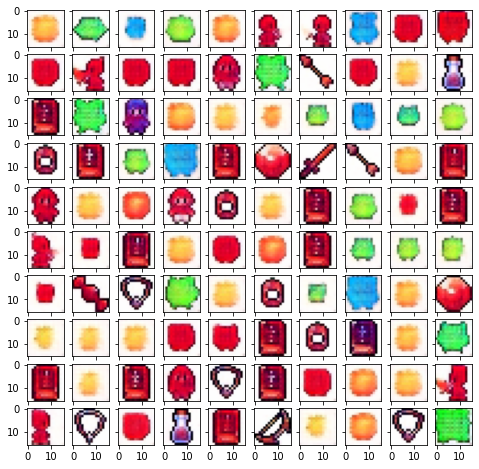

In [16]:
new_image = diffusion_model.sample(100)
fig, ax = plt.subplots(nrows=10, ncols=10,figsize=(8, 8), \
                        sharey=True, sharex=True)

new_images = np.transpose(new_image.to("cpu"), (0, 2, 3, 1))
for img, fig_x in zip(new_images, ax.flatten()):
    fig_x.imshow(img)
    fig_x.grid(False)

499it [01:57,  4.25it/s]


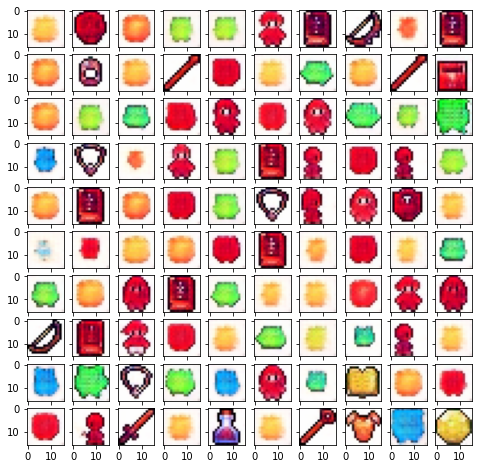

In [17]:
new_image = diffusion_model.sample(100, eta=0)
fig, ax = plt.subplots(nrows=10, ncols=10,figsize=(8, 8), \
                        sharey=True, sharex=True)

new_images = np.transpose(new_image.to("cpu"), (0, 2, 3, 1))
for img, fig_x in zip(new_images, ax.flatten()):
    fig_x.imshow(img)
    fig_x.grid(False)

In [ ]:
diffusion_model.upload_weights("signal_model2.pt")

## Conditional ddpm

In [ ]:
n_steps = 500

model = UNet(in_channels=3, out_channels=3, n_steps=n_steps, n_classes=5).to(device)
diffusion_model = DiffusionModel(model, img_size=16, n_steps=n_steps, is_conditioned=True)
n_epochs = 500
losses = diffusion_model.train(n_epochs, data_loader, len(dataset))

# best loss 0.029

  0%|          | 1/500 [00:00<03:45,  2.21it/s]

Loss at epoch 1: 1.007



  0%|          | 2/500 [00:00<03:36,  2.30it/s]

Loss at epoch 2: 0.819



  1%|          | 3/500 [00:01<03:49,  2.17it/s]

Loss at epoch 3: 0.708



  1%|          | 4/500 [00:01<03:44,  2.21it/s]

Loss at epoch 4: 0.618



  1%|          | 5/500 [00:02<03:41,  2.23it/s]

Loss at epoch 5: 0.539



  1%|          | 6/500 [00:02<03:39,  2.25it/s]

Loss at epoch 6: 0.487



  1%|▏         | 7/500 [00:03<03:35,  2.29it/s]

Loss at epoch 7: 0.430



  2%|▏         | 8/500 [00:03<03:31,  2.33it/s]

Loss at epoch 8: 0.387



  2%|▏         | 9/500 [00:03<03:27,  2.37it/s]

Loss at epoch 9: 0.342



  2%|▏         | 10/500 [00:04<03:25,  2.39it/s]

Loss at epoch 10: 0.314



  2%|▏         | 11/500 [00:04<03:26,  2.36it/s]

Loss at epoch 11: 0.281



  2%|▏         | 12/500 [00:05<03:29,  2.33it/s]

Loss at epoch 12: 0.268



  3%|▎         | 13/500 [00:05<03:29,  2.32it/s]

Loss at epoch 13: 0.258



  3%|▎         | 14/500 [00:06<03:28,  2.33it/s]

Loss at epoch 14: 0.241



  3%|▎         | 15/500 [00:06<03:27,  2.33it/s]

Loss at epoch 15: 0.230



  3%|▎         | 16/500 [00:06<03:26,  2.34it/s]

Loss at epoch 16: 0.220



  3%|▎         | 17/500 [00:07<03:28,  2.32it/s]

Loss at epoch 17: 0.199



  4%|▎         | 18/500 [00:07<03:28,  2.32it/s]

Loss at epoch 18: 0.201



  4%|▍         | 19/500 [00:08<03:25,  2.34it/s]

Loss at epoch 19: 0.200



  4%|▍         | 20/500 [00:08<03:22,  2.37it/s]

Loss at epoch 20: 0.195



  4%|▍         | 21/500 [00:09<03:20,  2.39it/s]

Loss at epoch 21: 0.192



  4%|▍         | 22/500 [00:09<03:25,  2.32it/s]

Loss at epoch 22: 0.183



  5%|▍         | 23/500 [00:09<03:22,  2.35it/s]

Loss at epoch 23: 0.186



  5%|▍         | 24/500 [00:10<03:23,  2.33it/s]

Loss at epoch 24: 0.179



  5%|▌         | 25/500 [00:10<03:23,  2.33it/s]

Loss at epoch 25: 0.186



  5%|▌         | 26/500 [00:11<03:21,  2.36it/s]

Loss at epoch 26: 0.180



  5%|▌         | 27/500 [00:11<03:25,  2.30it/s]

Loss at epoch 27: 0.175



  6%|▌         | 28/500 [00:12<03:27,  2.28it/s]

Loss at epoch 28: 0.171



  6%|▌         | 29/500 [00:12<03:26,  2.28it/s]

Loss at epoch 29: 0.176



  6%|▌         | 30/500 [00:12<03:28,  2.25it/s]

Loss at epoch 30: 0.170



  6%|▌         | 31/500 [00:13<03:25,  2.28it/s]

Loss at epoch 31: 0.167



  6%|▋         | 32/500 [00:13<03:22,  2.31it/s]

Loss at epoch 32: 0.170



  7%|▋         | 33/500 [00:14<03:19,  2.34it/s]

Loss at epoch 33: 0.173



  7%|▋         | 34/500 [00:14<03:20,  2.32it/s]

Loss at epoch 34: 0.168



  7%|▋         | 35/500 [00:15<03:21,  2.31it/s]

Loss at epoch 35: 0.163



  7%|▋         | 36/500 [00:15<03:21,  2.31it/s]

Loss at epoch 36: 0.175



  7%|▋         | 37/500 [00:15<03:18,  2.33it/s]

Loss at epoch 37: 0.160



  8%|▊         | 38/500 [00:16<04:13,  1.82it/s]

Loss at epoch 38: 0.153



  8%|▊         | 39/500 [00:17<03:57,  1.94it/s]

Loss at epoch 39: 0.150



  8%|▊         | 40/500 [00:17<03:48,  2.01it/s]

Loss at epoch 40: 0.149



  8%|▊         | 41/500 [00:18<03:40,  2.09it/s]

Loss at epoch 41: 0.142



  8%|▊         | 42/500 [00:18<03:31,  2.16it/s]

Loss at epoch 42: 0.152



  9%|▊         | 43/500 [00:18<03:26,  2.21it/s]

Loss at epoch 43: 0.147



  9%|▉         | 44/500 [00:19<03:27,  2.20it/s]

Loss at epoch 44: 0.140



  9%|▉         | 45/500 [00:19<03:26,  2.20it/s]

Loss at epoch 45: 0.147



  9%|▉         | 46/500 [00:20<03:25,  2.21it/s]

Loss at epoch 46: 0.147



  9%|▉         | 47/500 [00:20<03:22,  2.24it/s]

Loss at epoch 47: 0.148



 10%|▉         | 48/500 [00:21<03:20,  2.25it/s]

Loss at epoch 48: 0.145



 10%|▉         | 49/500 [00:21<03:18,  2.27it/s]

Loss at epoch 49: 0.144



 10%|█         | 50/500 [00:22<03:16,  2.29it/s]

Loss at epoch 50: 0.145



 10%|█         | 51/500 [00:22<03:15,  2.30it/s]

Loss at epoch 51: 0.137



 10%|█         | 52/500 [00:22<03:18,  2.25it/s]

Loss at epoch 52: 0.140



 11%|█         | 53/500 [00:23<03:24,  2.19it/s]

Loss at epoch 53: 0.133



 11%|█         | 54/500 [00:23<03:22,  2.20it/s]

Loss at epoch 54: 0.126



 11%|█         | 55/500 [00:24<03:23,  2.19it/s]

Loss at epoch 55: 0.138



 11%|█         | 56/500 [00:24<03:28,  2.13it/s]

Loss at epoch 56: 0.133



 11%|█▏        | 57/500 [00:25<03:22,  2.19it/s]

Loss at epoch 57: 0.131



 12%|█▏        | 58/500 [00:25<03:18,  2.22it/s]

Loss at epoch 58: 0.131



 12%|█▏        | 59/500 [00:26<03:16,  2.24it/s]

Loss at epoch 59: 0.131



 12%|█▏        | 60/500 [00:26<03:14,  2.26it/s]

Loss at epoch 60: 0.134



 12%|█▏        | 61/500 [00:27<03:13,  2.27it/s]

Loss at epoch 61: 0.132



 12%|█▏        | 62/500 [00:27<03:11,  2.29it/s]

Loss at epoch 62: 0.129



 13%|█▎        | 63/500 [00:27<03:10,  2.29it/s]

Loss at epoch 63: 0.129



 13%|█▎        | 64/500 [00:28<03:11,  2.28it/s]

Loss at epoch 64: 0.130



 13%|█▎        | 65/500 [00:28<03:13,  2.24it/s]

Loss at epoch 65: 0.125



 13%|█▎        | 66/500 [00:29<03:11,  2.27it/s]

Loss at epoch 66: 0.122



 13%|█▎        | 67/500 [00:29<03:08,  2.29it/s]

Loss at epoch 67: 0.125



 14%|█▎        | 68/500 [00:30<03:07,  2.30it/s]

Loss at epoch 68: 0.136



 14%|█▍        | 69/500 [00:30<03:05,  2.33it/s]

Loss at epoch 69: 0.127



 14%|█▍        | 70/500 [00:30<03:04,  2.33it/s]

Loss at epoch 70: 0.127



 14%|█▍        | 71/500 [00:31<03:05,  2.32it/s]

Loss at epoch 71: 0.121



 14%|█▍        | 72/500 [00:31<03:06,  2.30it/s]

Loss at epoch 72: 0.131



 15%|█▍        | 73/500 [00:32<03:07,  2.28it/s]

Loss at epoch 73: 0.121



 15%|█▍        | 74/500 [00:32<03:05,  2.30it/s]

Loss at epoch 74: 0.122



 15%|█▌        | 75/500 [00:33<03:04,  2.30it/s]

Loss at epoch 75: 0.116



 15%|█▌        | 76/500 [00:33<03:05,  2.29it/s]

Loss at epoch 76: 0.117



 15%|█▌        | 77/500 [00:33<03:02,  2.31it/s]

Loss at epoch 77: 0.123



 16%|█▌        | 78/500 [00:34<03:03,  2.30it/s]

Loss at epoch 78: 0.121



 16%|█▌        | 79/500 [00:34<03:05,  2.27it/s]

Loss at epoch 79: 0.119



 16%|█▌        | 80/500 [00:35<03:10,  2.20it/s]

Loss at epoch 80: 0.126



 16%|█▌        | 81/500 [00:35<03:10,  2.20it/s]

Loss at epoch 81: 0.114



 16%|█▋        | 82/500 [00:36<03:14,  2.15it/s]

Loss at epoch 82: 0.121



 17%|█▋        | 83/500 [00:36<03:14,  2.15it/s]

Loss at epoch 83: 0.111



 17%|█▋        | 84/500 [00:37<03:12,  2.16it/s]

Loss at epoch 84: 0.117



 17%|█▋        | 85/500 [00:37<03:08,  2.20it/s]

Loss at epoch 85: 0.116



 17%|█▋        | 86/500 [00:38<03:04,  2.25it/s]

Loss at epoch 86: 0.111



 17%|█▋        | 87/500 [00:38<03:00,  2.29it/s]

Loss at epoch 87: 0.115



 18%|█▊        | 88/500 [00:38<02:59,  2.29it/s]

Loss at epoch 88: 0.114



 18%|█▊        | 89/500 [00:39<02:58,  2.30it/s]

Loss at epoch 89: 0.119



 18%|█▊        | 90/500 [00:39<02:59,  2.29it/s]

Loss at epoch 90: 0.117



 18%|█▊        | 91/500 [00:40<02:58,  2.29it/s]

Loss at epoch 91: 0.117



 18%|█▊        | 92/500 [00:40<02:57,  2.30it/s]

Loss at epoch 92: 0.112



 19%|█▊        | 93/500 [00:41<02:55,  2.32it/s]

Loss at epoch 93: 0.106



 19%|█▉        | 94/500 [00:41<02:56,  2.30it/s]

Loss at epoch 94: 0.112



 19%|█▉        | 95/500 [00:41<02:54,  2.32it/s]

Loss at epoch 95: 0.114



 19%|█▉        | 96/500 [00:42<02:55,  2.30it/s]

Loss at epoch 96: 0.108



 19%|█▉        | 97/500 [00:42<02:53,  2.32it/s]

Loss at epoch 97: 0.110



 20%|█▉        | 98/500 [00:43<02:55,  2.29it/s]

Loss at epoch 98: 0.108



 20%|█▉        | 99/500 [00:43<02:53,  2.31it/s]

Loss at epoch 99: 0.118



 20%|██        | 100/500 [00:44<02:53,  2.31it/s]

Loss at epoch 100: 0.102



 20%|██        | 101/500 [00:44<02:55,  2.28it/s]

Loss at epoch 101: 0.103



 20%|██        | 102/500 [00:45<02:58,  2.22it/s]

Loss at epoch 102: 0.109



 21%|██        | 103/500 [00:45<02:58,  2.22it/s]

Loss at epoch 103: 0.113



 21%|██        | 104/500 [00:45<02:55,  2.26it/s]

Loss at epoch 104: 0.109



 21%|██        | 105/500 [00:46<02:54,  2.26it/s]

Loss at epoch 105: 0.117



 21%|██        | 106/500 [00:46<02:54,  2.26it/s]

Loss at epoch 106: 0.112



 21%|██▏       | 107/500 [00:47<02:53,  2.27it/s]

Loss at epoch 107: 0.106



 22%|██▏       | 108/500 [00:47<02:52,  2.27it/s]

Loss at epoch 108: 0.106



 22%|██▏       | 109/500 [00:48<02:54,  2.24it/s]

Loss at epoch 109: 0.105



 22%|██▏       | 110/500 [00:48<02:53,  2.25it/s]

Loss at epoch 110: 0.104



 22%|██▏       | 111/500 [00:49<02:55,  2.22it/s]

Loss at epoch 111: 0.110



 22%|██▏       | 112/500 [00:49<02:53,  2.23it/s]

Loss at epoch 112: 0.099



 23%|██▎       | 113/500 [00:49<02:52,  2.24it/s]

Loss at epoch 113: 0.102



 23%|██▎       | 114/500 [00:50<02:55,  2.20it/s]

Loss at epoch 114: 0.106



 23%|██▎       | 115/500 [00:50<02:54,  2.21it/s]

Loss at epoch 115: 0.106



 23%|██▎       | 116/500 [00:51<02:53,  2.21it/s]

Loss at epoch 116: 0.108



 23%|██▎       | 117/500 [00:51<02:52,  2.22it/s]

Loss at epoch 117: 0.098



 24%|██▎       | 118/500 [00:52<02:52,  2.22it/s]

Loss at epoch 118: 0.105



 24%|██▍       | 119/500 [00:52<02:51,  2.23it/s]

Loss at epoch 119: 0.112



 24%|██▍       | 120/500 [00:53<02:49,  2.24it/s]

Loss at epoch 120: 0.102



 24%|██▍       | 121/500 [00:53<02:47,  2.26it/s]

Loss at epoch 121: 0.103



 24%|██▍       | 122/500 [00:53<02:45,  2.29it/s]

Loss at epoch 122: 0.108



 25%|██▍       | 123/500 [00:54<02:44,  2.30it/s]

Loss at epoch 123: 0.101



 25%|██▍       | 124/500 [00:54<02:44,  2.28it/s]

Loss at epoch 124: 0.107



 25%|██▌       | 125/500 [00:55<02:45,  2.27it/s]

Loss at epoch 125: 0.102



 25%|██▌       | 126/500 [00:55<02:44,  2.27it/s]

Loss at epoch 126: 0.103



 25%|██▌       | 127/500 [00:56<02:45,  2.25it/s]

Loss at epoch 127: 0.101



 26%|██▌       | 128/500 [00:56<02:47,  2.22it/s]

Loss at epoch 128: 0.102



 26%|██▌       | 129/500 [00:57<02:43,  2.27it/s]

Loss at epoch 129: 0.103



 26%|██▌       | 130/500 [00:57<02:41,  2.29it/s]

Loss at epoch 130: 0.098



 26%|██▌       | 131/500 [00:57<02:41,  2.29it/s]

Loss at epoch 131: 0.097



 26%|██▋       | 132/500 [00:58<02:41,  2.28it/s]

Loss at epoch 132: 0.100



 27%|██▋       | 133/500 [00:58<02:43,  2.24it/s]

Loss at epoch 133: 0.104



 27%|██▋       | 134/500 [00:59<02:47,  2.18it/s]

Loss at epoch 134: 0.100



 27%|██▋       | 135/500 [00:59<02:47,  2.18it/s]

Loss at epoch 135: 0.096



 27%|██▋       | 136/500 [01:00<02:45,  2.20it/s]

Loss at epoch 136: 0.099



 27%|██▋       | 137/500 [01:00<02:43,  2.22it/s]

Loss at epoch 137: 0.102



 28%|██▊       | 138/500 [01:01<02:39,  2.26it/s]

Loss at epoch 138: 0.094



 28%|██▊       | 139/500 [01:01<02:38,  2.27it/s]

Loss at epoch 139: 0.102



 28%|██▊       | 140/500 [01:01<02:37,  2.28it/s]

Loss at epoch 140: 0.098



 28%|██▊       | 141/500 [01:02<02:40,  2.23it/s]

Loss at epoch 141: 0.100



 28%|██▊       | 142/500 [01:02<02:37,  2.28it/s]

Loss at epoch 142: 0.092



 29%|██▊       | 143/500 [01:03<02:40,  2.23it/s]

Loss at epoch 143: 0.098



 29%|██▉       | 144/500 [01:03<02:38,  2.25it/s]

Loss at epoch 144: 0.098



 29%|██▉       | 145/500 [01:04<02:38,  2.24it/s]

Loss at epoch 145: 0.099



 29%|██▉       | 146/500 [01:04<02:38,  2.24it/s]

Loss at epoch 146: 0.094



 29%|██▉       | 147/500 [01:05<02:40,  2.20it/s]

Loss at epoch 147: 0.093



 30%|██▉       | 148/500 [01:05<02:40,  2.19it/s]

Loss at epoch 148: 0.099



 30%|██▉       | 149/500 [01:06<02:37,  2.24it/s]

Loss at epoch 149: 0.096



 30%|███       | 150/500 [01:06<02:33,  2.28it/s]

Loss at epoch 150: 0.098



 30%|███       | 151/500 [01:06<02:31,  2.30it/s]

Loss at epoch 151: 0.093



 30%|███       | 152/500 [01:07<02:30,  2.31it/s]

Loss at epoch 152: 0.100



 31%|███       | 153/500 [01:07<02:32,  2.27it/s]

Loss at epoch 153: 0.092



 31%|███       | 154/500 [01:08<02:32,  2.27it/s]

Loss at epoch 154: 0.093



 31%|███       | 155/500 [01:08<02:30,  2.30it/s]

Loss at epoch 155: 0.088



 31%|███       | 156/500 [01:09<02:28,  2.31it/s]

Loss at epoch 156: 0.094



 31%|███▏      | 157/500 [01:09<02:31,  2.27it/s]

Loss at epoch 157: 0.094



 32%|███▏      | 158/500 [01:09<02:30,  2.28it/s]

Loss at epoch 158: 0.093



 32%|███▏      | 159/500 [01:10<02:33,  2.22it/s]

Loss at epoch 159: 0.094



 32%|███▏      | 160/500 [01:10<02:33,  2.22it/s]

Loss at epoch 160: 0.091



 32%|███▏      | 161/500 [01:11<02:33,  2.20it/s]

Loss at epoch 161: 0.094



 32%|███▏      | 162/500 [01:11<02:34,  2.19it/s]

Loss at epoch 162: 0.096



 33%|███▎      | 163/500 [01:12<02:30,  2.24it/s]

Loss at epoch 163: 0.086



 33%|███▎      | 164/500 [01:12<02:28,  2.26it/s]

Loss at epoch 164: 0.086



 33%|███▎      | 165/500 [01:13<02:27,  2.27it/s]

Loss at epoch 165: 0.098



 33%|███▎      | 166/500 [01:13<02:26,  2.28it/s]

Loss at epoch 166: 0.091



 33%|███▎      | 167/500 [01:13<02:25,  2.29it/s]

Loss at epoch 167: 0.095



 34%|███▎      | 168/500 [01:14<02:25,  2.27it/s]

Loss at epoch 168: 0.091



 34%|███▍      | 169/500 [01:14<02:25,  2.28it/s]

Loss at epoch 169: 0.091



 34%|███▍      | 170/500 [01:15<02:24,  2.29it/s]

Loss at epoch 170: 0.086



 34%|███▍      | 171/500 [01:15<02:25,  2.26it/s]

Loss at epoch 171: 0.096



 34%|███▍      | 172/500 [01:16<02:23,  2.28it/s]

Loss at epoch 172: 0.083



 35%|███▍      | 173/500 [01:16<02:22,  2.29it/s]

Loss at epoch 173: 0.095



 35%|███▍      | 174/500 [01:17<02:24,  2.25it/s]

Loss at epoch 174: 0.089



 35%|███▌      | 175/500 [01:17<02:27,  2.20it/s]

Loss at epoch 175: 0.087



 35%|███▌      | 176/500 [01:18<02:29,  2.17it/s]

Loss at epoch 176: 0.089



 35%|███▌      | 177/500 [01:18<02:26,  2.21it/s]

Loss at epoch 177: 0.093



 36%|███▌      | 178/500 [01:18<02:25,  2.22it/s]

Loss at epoch 178: 0.093



 36%|███▌      | 179/500 [01:19<02:22,  2.25it/s]

Loss at epoch 179: 0.082



 36%|███▌      | 180/500 [01:19<02:21,  2.27it/s]

Loss at epoch 180: 0.084



 36%|███▌      | 181/500 [01:20<02:20,  2.26it/s]

Loss at epoch 181: 0.090



 36%|███▋      | 182/500 [01:20<02:20,  2.26it/s]

Loss at epoch 182: 0.087



 37%|███▋      | 183/500 [01:21<02:18,  2.28it/s]

Loss at epoch 183: 0.092



 37%|███▋      | 184/500 [01:21<02:17,  2.29it/s]

Loss at epoch 184: 0.084



 37%|███▋      | 185/500 [01:21<02:22,  2.21it/s]

Loss at epoch 185: 0.089



 37%|███▋      | 186/500 [01:22<02:22,  2.20it/s]

Loss at epoch 186: 0.090



 37%|███▋      | 187/500 [01:22<02:20,  2.23it/s]

Loss at epoch 187: 0.089



 38%|███▊      | 188/500 [01:23<02:27,  2.11it/s]

Loss at epoch 188: 0.085



 38%|███▊      | 189/500 [01:23<02:23,  2.17it/s]

Loss at epoch 189: 0.082



 38%|███▊      | 190/500 [01:24<02:19,  2.23it/s]

Loss at epoch 190: 0.087



 38%|███▊      | 191/500 [01:24<02:17,  2.25it/s]

Loss at epoch 191: 0.087



 38%|███▊      | 192/500 [01:25<02:15,  2.27it/s]

Loss at epoch 192: 0.084



 39%|███▊      | 193/500 [01:25<02:15,  2.26it/s]

Loss at epoch 193: 0.083



 39%|███▉      | 194/500 [01:25<02:14,  2.28it/s]

Loss at epoch 194: 0.093



 39%|███▉      | 195/500 [01:26<02:15,  2.25it/s]

Loss at epoch 195: 0.084



 39%|███▉      | 196/500 [01:26<02:13,  2.28it/s]

Loss at epoch 196: 0.091



 39%|███▉      | 197/500 [01:27<02:11,  2.30it/s]

Loss at epoch 197: 0.084



 40%|███▉      | 198/500 [01:27<02:10,  2.31it/s]

Loss at epoch 198: 0.084



 40%|███▉      | 199/500 [01:28<02:09,  2.32it/s]

Loss at epoch 199: 0.084



 40%|████      | 200/500 [01:28<02:08,  2.33it/s]

Loss at epoch 200: 0.088



 40%|████      | 201/500 [01:29<02:08,  2.32it/s]

Loss at epoch 201: 0.091



 40%|████      | 202/500 [01:29<02:09,  2.31it/s]

Loss at epoch 202: 0.082



 41%|████      | 203/500 [01:29<02:10,  2.27it/s]

Loss at epoch 203: 0.084



 41%|████      | 204/500 [01:30<02:10,  2.28it/s]

Loss at epoch 204: 0.086



 41%|████      | 205/500 [01:30<02:09,  2.29it/s]

Loss at epoch 205: 0.082



 41%|████      | 206/500 [01:31<02:07,  2.30it/s]

Loss at epoch 206: 0.086



 41%|████▏     | 207/500 [01:31<02:07,  2.31it/s]

Loss at epoch 207: 0.082



 42%|████▏     | 208/500 [01:32<02:07,  2.29it/s]

Loss at epoch 208: 0.083



 42%|████▏     | 209/500 [01:32<02:06,  2.30it/s]

Loss at epoch 209: 0.081



 42%|████▏     | 210/500 [01:32<02:05,  2.32it/s]

Loss at epoch 210: 0.079



 42%|████▏     | 211/500 [01:33<02:04,  2.31it/s]

Loss at epoch 211: 0.084



 42%|████▏     | 212/500 [01:33<02:06,  2.27it/s]

Loss at epoch 212: 0.083



 43%|████▎     | 213/500 [01:34<02:05,  2.28it/s]

Loss at epoch 213: 0.081



 43%|████▎     | 214/500 [01:34<02:07,  2.24it/s]

Loss at epoch 214: 0.075



 43%|████▎     | 215/500 [01:35<02:08,  2.22it/s]

Loss at epoch 215: 0.080



 43%|████▎     | 216/500 [01:35<02:07,  2.23it/s]

Loss at epoch 216: 0.084



 43%|████▎     | 217/500 [01:36<02:03,  2.29it/s]

Loss at epoch 217: 0.083



 44%|████▎     | 218/500 [01:36<02:04,  2.26it/s]

Loss at epoch 218: 0.082



 44%|████▍     | 219/500 [01:36<02:03,  2.27it/s]

Loss at epoch 219: 0.079



 44%|████▍     | 220/500 [01:37<02:01,  2.30it/s]

Loss at epoch 220: 0.082



 44%|████▍     | 221/500 [01:37<02:00,  2.31it/s]

Loss at epoch 221: 0.080



 44%|████▍     | 222/500 [01:38<01:59,  2.32it/s]

Loss at epoch 222: 0.078



 45%|████▍     | 223/500 [01:38<02:01,  2.29it/s]

Loss at epoch 223: 0.079



 45%|████▍     | 224/500 [01:39<02:01,  2.27it/s]

Loss at epoch 224: 0.075



 45%|████▌     | 225/500 [01:39<02:00,  2.29it/s]

Loss at epoch 225: 0.075



 45%|████▌     | 226/500 [01:39<01:58,  2.31it/s]

Loss at epoch 226: 0.080



 45%|████▌     | 227/500 [01:40<01:58,  2.31it/s]

Loss at epoch 227: 0.079



 46%|████▌     | 228/500 [01:40<01:58,  2.30it/s]

Loss at epoch 228: 0.078



 46%|████▌     | 229/500 [01:41<01:57,  2.30it/s]

Loss at epoch 229: 0.080



 46%|████▌     | 230/500 [01:41<01:56,  2.32it/s]

Loss at epoch 230: 0.079



 46%|████▌     | 231/500 [01:42<01:55,  2.33it/s]

Loss at epoch 231: 0.078



 46%|████▋     | 232/500 [01:42<01:56,  2.31it/s]

Loss at epoch 232: 0.082



 47%|████▋     | 233/500 [01:42<01:54,  2.33it/s]

Loss at epoch 233: 0.081



 47%|████▋     | 234/500 [01:43<01:54,  2.32it/s]

Loss at epoch 234: 0.077



 47%|████▋     | 235/500 [01:43<01:53,  2.33it/s]

Loss at epoch 235: 0.075



 47%|████▋     | 236/500 [01:44<01:53,  2.32it/s]

Loss at epoch 236: 0.079



 47%|████▋     | 237/500 [01:44<01:52,  2.33it/s]

Loss at epoch 237: 0.076



 48%|████▊     | 238/500 [01:45<01:56,  2.25it/s]

Loss at epoch 238: 0.079



 48%|████▊     | 239/500 [01:45<01:58,  2.20it/s]

Loss at epoch 239: 0.075



 48%|████▊     | 240/500 [01:46<01:57,  2.21it/s]

Loss at epoch 240: 0.080



 48%|████▊     | 241/500 [01:46<01:57,  2.21it/s]

Loss at epoch 241: 0.077



 48%|████▊     | 242/500 [01:47<01:57,  2.20it/s]

Loss at epoch 242: 0.079



 49%|████▊     | 243/500 [01:47<01:55,  2.23it/s]

Loss at epoch 243: 0.077



 49%|████▉     | 244/500 [01:47<01:54,  2.23it/s]

Loss at epoch 244: 0.081



 49%|████▉     | 245/500 [01:48<01:52,  2.26it/s]

Loss at epoch 245: 0.078



 49%|████▉     | 246/500 [01:48<01:52,  2.26it/s]

Loss at epoch 246: 0.078



 49%|████▉     | 247/500 [01:49<01:50,  2.29it/s]

Loss at epoch 247: 0.080



 50%|████▉     | 248/500 [01:49<01:49,  2.30it/s]

Loss at epoch 248: 0.079



 50%|████▉     | 249/500 [01:50<01:48,  2.31it/s]

Loss at epoch 249: 0.077



 50%|█████     | 250/500 [01:50<01:49,  2.27it/s]

Loss at epoch 250: 0.075



 50%|█████     | 251/500 [01:50<01:49,  2.27it/s]

Loss at epoch 251: 0.077



 50%|█████     | 252/500 [01:51<01:48,  2.28it/s]

Loss at epoch 252: 0.080



 51%|█████     | 253/500 [01:51<01:47,  2.30it/s]

Loss at epoch 253: 0.081



 51%|█████     | 254/500 [01:52<01:46,  2.32it/s]

Loss at epoch 254: 0.079



 51%|█████     | 255/500 [01:52<01:47,  2.29it/s]

Loss at epoch 255: 0.079



 51%|█████     | 256/500 [01:53<01:49,  2.23it/s]

Loss at epoch 256: 0.075



 51%|█████▏    | 257/500 [01:53<01:48,  2.24it/s]

Loss at epoch 257: 0.078



 52%|█████▏    | 258/500 [01:54<01:46,  2.28it/s]

Loss at epoch 258: 0.073



 52%|█████▏    | 259/500 [01:54<01:46,  2.26it/s]

Loss at epoch 259: 0.077



 52%|█████▏    | 260/500 [01:54<01:46,  2.26it/s]

Loss at epoch 260: 0.073



 52%|█████▏    | 261/500 [01:55<01:45,  2.26it/s]

Loss at epoch 261: 0.074



 52%|█████▏    | 262/500 [01:55<01:46,  2.24it/s]

Loss at epoch 262: 0.075



 53%|█████▎    | 263/500 [01:56<01:43,  2.29it/s]

Loss at epoch 263: 0.075



 53%|█████▎    | 264/500 [01:56<01:45,  2.23it/s]

Loss at epoch 264: 0.077



 53%|█████▎    | 265/500 [01:57<01:46,  2.22it/s]

Loss at epoch 265: 0.079



 53%|█████▎    | 266/500 [01:57<01:48,  2.16it/s]

Loss at epoch 266: 0.075



 53%|█████▎    | 267/500 [01:58<01:46,  2.18it/s]

Loss at epoch 267: 0.076



 54%|█████▎    | 268/500 [01:58<01:45,  2.19it/s]

Loss at epoch 268: 0.072



 54%|█████▍    | 269/500 [01:59<01:45,  2.20it/s]

Loss at epoch 269: 0.073



 54%|█████▍    | 270/500 [01:59<01:43,  2.23it/s]

Loss at epoch 270: 0.075



 54%|█████▍    | 271/500 [01:59<01:41,  2.25it/s]

Loss at epoch 271: 0.075



 54%|█████▍    | 272/500 [02:00<01:41,  2.25it/s]

Loss at epoch 272: 0.073



 55%|█████▍    | 273/500 [02:00<01:41,  2.25it/s]

Loss at epoch 273: 0.072



 55%|█████▍    | 274/500 [02:01<01:39,  2.26it/s]

Loss at epoch 274: 0.074



 55%|█████▌    | 275/500 [02:01<01:39,  2.26it/s]

Loss at epoch 275: 0.073



 55%|█████▌    | 276/500 [02:02<01:40,  2.24it/s]

Loss at epoch 276: 0.071



 55%|█████▌    | 277/500 [02:02<01:39,  2.25it/s]

Loss at epoch 277: 0.075



 56%|█████▌    | 278/500 [02:03<01:39,  2.23it/s]

Loss at epoch 278: 0.071



 56%|█████▌    | 279/500 [02:03<01:39,  2.22it/s]

Loss at epoch 279: 0.073



 56%|█████▌    | 280/500 [02:03<01:39,  2.22it/s]

Loss at epoch 280: 0.071



 56%|█████▌    | 281/500 [02:04<01:52,  1.94it/s]

Loss at epoch 281: 0.071



 56%|█████▋    | 282/500 [02:05<01:47,  2.02it/s]

Loss at epoch 282: 0.077



 57%|█████▋    | 283/500 [02:05<01:43,  2.09it/s]

Loss at epoch 283: 0.075



 57%|█████▋    | 284/500 [02:05<01:41,  2.12it/s]

Loss at epoch 284: 0.073



 57%|█████▋    | 285/500 [02:06<01:39,  2.15it/s]

Loss at epoch 285: 0.071



 57%|█████▋    | 286/500 [02:06<01:39,  2.16it/s]

Loss at epoch 286: 0.068



 57%|█████▋    | 287/500 [02:07<01:36,  2.20it/s]

Loss at epoch 287: 0.078



 58%|█████▊    | 288/500 [02:07<01:36,  2.19it/s]

Loss at epoch 288: 0.067



 58%|█████▊    | 289/500 [02:08<01:33,  2.25it/s]

Loss at epoch 289: 0.070



 58%|█████▊    | 290/500 [02:08<01:32,  2.27it/s]

Loss at epoch 290: 0.077



 58%|█████▊    | 291/500 [02:09<01:33,  2.25it/s]

Loss at epoch 291: 0.074



 58%|█████▊    | 292/500 [02:09<01:34,  2.19it/s]

Loss at epoch 292: 0.070



 59%|█████▊    | 293/500 [02:09<01:35,  2.16it/s]

Loss at epoch 293: 0.076



 59%|█████▉    | 294/500 [02:10<01:36,  2.14it/s]

Loss at epoch 294: 0.071



 59%|█████▉    | 295/500 [02:10<01:32,  2.21it/s]

Loss at epoch 295: 0.072



 59%|█████▉    | 296/500 [02:11<01:31,  2.22it/s]

Loss at epoch 296: 0.077



 59%|█████▉    | 297/500 [02:11<01:30,  2.24it/s]

Loss at epoch 297: 0.068



 60%|█████▉    | 298/500 [02:12<01:29,  2.25it/s]

Loss at epoch 298: 0.071



 60%|█████▉    | 299/500 [02:12<01:29,  2.25it/s]

Loss at epoch 299: 0.071



 60%|██████    | 300/500 [02:13<01:28,  2.27it/s]

Loss at epoch 300: 0.069



 60%|██████    | 301/500 [02:13<01:29,  2.23it/s]

Loss at epoch 301: 0.069



 60%|██████    | 302/500 [02:13<01:28,  2.25it/s]

Loss at epoch 302: 0.067



 61%|██████    | 303/500 [02:14<01:26,  2.27it/s]

Loss at epoch 303: 0.070



 61%|██████    | 304/500 [02:14<01:25,  2.28it/s]

Loss at epoch 304: 0.071



 61%|██████    | 305/500 [02:15<01:26,  2.26it/s]

Loss at epoch 305: 0.070



 61%|██████    | 306/500 [02:15<01:25,  2.28it/s]

Loss at epoch 306: 0.072



 61%|██████▏   | 307/500 [02:16<01:25,  2.27it/s]

Loss at epoch 307: 0.074



 62%|██████▏   | 308/500 [02:16<01:24,  2.27it/s]

Loss at epoch 308: 0.070



 62%|██████▏   | 309/500 [02:17<01:24,  2.25it/s]

Loss at epoch 309: 0.070



 62%|██████▏   | 310/500 [02:17<01:24,  2.24it/s]

Loss at epoch 310: 0.068



 62%|██████▏   | 311/500 [02:17<01:24,  2.25it/s]

Loss at epoch 311: 0.066



 62%|██████▏   | 312/500 [02:18<01:26,  2.19it/s]

Loss at epoch 312: 0.063



 63%|██████▎   | 313/500 [02:18<01:25,  2.20it/s]

Loss at epoch 313: 0.068



 63%|██████▎   | 314/500 [02:19<01:23,  2.24it/s]

Loss at epoch 314: 0.071



 63%|██████▎   | 315/500 [02:19<01:21,  2.27it/s]

Loss at epoch 315: 0.067



 63%|██████▎   | 316/500 [02:20<01:20,  2.29it/s]

Loss at epoch 316: 0.066



 63%|██████▎   | 317/500 [02:20<01:21,  2.24it/s]

Loss at epoch 317: 0.065



 64%|██████▎   | 318/500 [02:21<01:22,  2.22it/s]

Loss at epoch 318: 0.066



 64%|██████▍   | 319/500 [02:21<01:22,  2.19it/s]

Loss at epoch 319: 0.067



 64%|██████▍   | 320/500 [02:22<01:22,  2.18it/s]

Loss at epoch 320: 0.073



 64%|██████▍   | 321/500 [02:22<01:21,  2.19it/s]

Loss at epoch 321: 0.066



 64%|██████▍   | 322/500 [02:22<01:20,  2.20it/s]

Loss at epoch 322: 0.063



 65%|██████▍   | 323/500 [02:23<01:19,  2.21it/s]

Loss at epoch 323: 0.073



 65%|██████▍   | 324/500 [02:23<01:19,  2.21it/s]

Loss at epoch 324: 0.070



 65%|██████▌   | 325/500 [02:24<01:18,  2.22it/s]

Loss at epoch 325: 0.066



 65%|██████▌   | 326/500 [02:24<01:17,  2.23it/s]

Loss at epoch 326: 0.069



 65%|██████▌   | 327/500 [02:25<01:18,  2.20it/s]

Loss at epoch 327: 0.067



 66%|██████▌   | 328/500 [02:25<01:16,  2.25it/s]

Loss at epoch 328: 0.065



 66%|██████▌   | 329/500 [02:26<01:14,  2.29it/s]

Loss at epoch 329: 0.066



 66%|██████▌   | 330/500 [02:26<01:13,  2.31it/s]

Loss at epoch 330: 0.069



 66%|██████▌   | 331/500 [02:26<01:13,  2.30it/s]

Loss at epoch 331: 0.063



 66%|██████▋   | 332/500 [02:27<01:14,  2.25it/s]

Loss at epoch 332: 0.065



 67%|██████▋   | 333/500 [02:27<01:14,  2.24it/s]

Loss at epoch 333: 0.064



 67%|██████▋   | 334/500 [02:28<01:13,  2.25it/s]

Loss at epoch 334: 0.067



 67%|██████▋   | 335/500 [02:28<01:12,  2.27it/s]

Loss at epoch 335: 0.063



 67%|██████▋   | 336/500 [02:29<01:12,  2.25it/s]

Loss at epoch 336: 0.065



 67%|██████▋   | 337/500 [02:29<01:12,  2.26it/s]

Loss at epoch 337: 0.066



 68%|██████▊   | 338/500 [02:30<01:10,  2.28it/s]

Loss at epoch 338: 0.066



 68%|██████▊   | 339/500 [02:30<01:09,  2.32it/s]

Loss at epoch 339: 0.068



 68%|██████▊   | 340/500 [02:30<01:10,  2.27it/s]

Loss at epoch 340: 0.071



 68%|██████▊   | 341/500 [02:31<01:10,  2.27it/s]

Loss at epoch 341: 0.067



 68%|██████▊   | 342/500 [02:31<01:10,  2.24it/s]

Loss at epoch 342: 0.069



 69%|██████▊   | 343/500 [02:32<01:10,  2.23it/s]

Loss at epoch 343: 0.063



 69%|██████▉   | 344/500 [02:32<01:10,  2.23it/s]

Loss at epoch 344: 0.069



 69%|██████▉   | 345/500 [02:33<01:09,  2.22it/s]

Loss at epoch 345: 0.063



 69%|██████▉   | 346/500 [02:33<01:10,  2.18it/s]

Loss at epoch 346: 0.069



 69%|██████▉   | 347/500 [02:34<01:10,  2.18it/s]

Loss at epoch 347: 0.067



 70%|██████▉   | 348/500 [02:34<01:09,  2.20it/s]

Loss at epoch 348: 0.065



 70%|██████▉   | 349/500 [02:34<01:07,  2.22it/s]

Loss at epoch 349: 0.065



 70%|███████   | 350/500 [02:35<01:07,  2.22it/s]

Loss at epoch 350: 0.067



 70%|███████   | 351/500 [02:35<01:06,  2.25it/s]

Loss at epoch 351: 0.063



 70%|███████   | 352/500 [02:36<01:05,  2.27it/s]

Loss at epoch 352: 0.064



 71%|███████   | 353/500 [02:36<01:05,  2.23it/s]

Loss at epoch 353: 0.061



 71%|███████   | 354/500 [02:37<01:05,  2.22it/s]

Loss at epoch 354: 0.070



 71%|███████   | 355/500 [02:37<01:04,  2.24it/s]

Loss at epoch 355: 0.069



 71%|███████   | 356/500 [02:38<01:04,  2.24it/s]

Loss at epoch 356: 0.065



 71%|███████▏  | 357/500 [02:38<01:03,  2.25it/s]

Loss at epoch 357: 0.065



 72%|███████▏  | 358/500 [02:38<01:03,  2.23it/s]

Loss at epoch 358: 0.061



 72%|███████▏  | 359/500 [02:39<01:02,  2.24it/s]

Loss at epoch 359: 0.068



 72%|███████▏  | 360/500 [02:39<01:02,  2.23it/s]

Loss at epoch 360: 0.062



 72%|███████▏  | 361/500 [02:40<01:01,  2.25it/s]

Loss at epoch 361: 0.061



 72%|███████▏  | 362/500 [02:40<01:01,  2.24it/s]

Loss at epoch 362: 0.064



 73%|███████▎  | 363/500 [02:41<01:00,  2.26it/s]

Loss at epoch 363: 0.062



 73%|███████▎  | 364/500 [02:41<01:01,  2.23it/s]

Loss at epoch 364: 0.065



 73%|███████▎  | 365/500 [02:42<00:59,  2.25it/s]

Loss at epoch 365: 0.060



 73%|███████▎  | 366/500 [02:42<00:59,  2.26it/s]

Loss at epoch 366: 0.066



 73%|███████▎  | 367/500 [02:42<00:58,  2.27it/s]

Loss at epoch 367: 0.061



 74%|███████▎  | 368/500 [02:43<00:58,  2.27it/s]

Loss at epoch 368: 0.065



 74%|███████▍  | 369/500 [02:43<00:58,  2.26it/s]

Loss at epoch 369: 0.067



 74%|███████▍  | 370/500 [02:44<00:57,  2.25it/s]

Loss at epoch 370: 0.062



 74%|███████▍  | 371/500 [02:44<00:58,  2.22it/s]

Loss at epoch 371: 0.064



 74%|███████▍  | 372/500 [02:45<00:59,  2.16it/s]

Loss at epoch 372: 0.058



 75%|███████▍  | 373/500 [02:45<00:58,  2.18it/s]

Loss at epoch 373: 0.063



 75%|███████▍  | 374/500 [02:46<00:58,  2.16it/s]

Loss at epoch 374: 0.061



 75%|███████▌  | 375/500 [02:46<00:57,  2.19it/s]

Loss at epoch 375: 0.065



 75%|███████▌  | 376/500 [02:47<00:56,  2.20it/s]

Loss at epoch 376: 0.065



 75%|███████▌  | 377/500 [02:47<00:56,  2.19it/s]

Loss at epoch 377: 0.063



 76%|███████▌  | 378/500 [02:47<00:55,  2.20it/s]

Loss at epoch 378: 0.063



 76%|███████▌  | 379/500 [02:48<00:54,  2.24it/s]

Loss at epoch 379: 0.063



 76%|███████▌  | 380/500 [02:48<00:53,  2.25it/s]

Loss at epoch 380: 0.059



 76%|███████▌  | 381/500 [02:49<00:52,  2.25it/s]

Loss at epoch 381: 0.064



 76%|███████▋  | 382/500 [02:49<00:53,  2.21it/s]

Loss at epoch 382: 0.064



 77%|███████▋  | 383/500 [02:50<00:52,  2.22it/s]

Loss at epoch 383: 0.061



 77%|███████▋  | 384/500 [02:50<00:52,  2.23it/s]

Loss at epoch 384: 0.061



 77%|███████▋  | 385/500 [02:51<00:51,  2.25it/s]

Loss at epoch 385: 0.059



 77%|███████▋  | 386/500 [02:51<00:50,  2.26it/s]

Loss at epoch 386: 0.061



 77%|███████▋  | 387/500 [02:51<00:49,  2.29it/s]

Loss at epoch 387: 0.062



 78%|███████▊  | 388/500 [02:52<00:48,  2.30it/s]

Loss at epoch 388: 0.058



 78%|███████▊  | 389/500 [02:52<00:48,  2.27it/s]

Loss at epoch 389: 0.062



 78%|███████▊  | 390/500 [02:53<00:49,  2.23it/s]

Loss at epoch 390: 0.066



 78%|███████▊  | 391/500 [02:53<00:48,  2.25it/s]

Loss at epoch 391: 0.059



 78%|███████▊  | 392/500 [02:54<00:47,  2.26it/s]

Loss at epoch 392: 0.064



 79%|███████▊  | 393/500 [02:54<00:46,  2.28it/s]

Loss at epoch 393: 0.056



 79%|███████▉  | 394/500 [02:55<00:46,  2.27it/s]

Loss at epoch 394: 0.062



 79%|███████▉  | 395/500 [02:55<00:46,  2.27it/s]

Loss at epoch 395: 0.058



 79%|███████▉  | 396/500 [02:55<00:45,  2.27it/s]

Loss at epoch 396: 0.058



 79%|███████▉  | 397/500 [02:56<00:46,  2.22it/s]

Loss at epoch 397: 0.058



 80%|███████▉  | 398/500 [02:56<00:46,  2.18it/s]

Loss at epoch 398: 0.058



 80%|███████▉  | 399/500 [02:57<00:47,  2.11it/s]

Loss at epoch 399: 0.060



 80%|████████  | 400/500 [02:57<00:45,  2.19it/s]

Loss at epoch 400: 0.062



 80%|████████  | 401/500 [02:58<00:44,  2.22it/s]

Loss at epoch 401: 0.062



 80%|████████  | 402/500 [02:58<00:44,  2.22it/s]

Loss at epoch 402: 0.059



 81%|████████  | 403/500 [02:59<00:43,  2.22it/s]

Loss at epoch 403: 0.061



 81%|████████  | 404/500 [02:59<00:43,  2.23it/s]

Loss at epoch 404: 0.059



 81%|████████  | 405/500 [03:00<00:42,  2.26it/s]

Loss at epoch 405: 0.059



 81%|████████  | 406/500 [03:00<00:41,  2.26it/s]

Loss at epoch 406: 0.060



 81%|████████▏ | 407/500 [03:00<00:41,  2.26it/s]

Loss at epoch 407: 0.063



 82%|████████▏ | 408/500 [03:01<00:41,  2.23it/s]

Loss at epoch 408: 0.062



 82%|████████▏ | 409/500 [03:01<00:40,  2.23it/s]

Loss at epoch 409: 0.058



 82%|████████▏ | 410/500 [03:02<00:40,  2.25it/s]

Loss at epoch 410: 0.061



 82%|████████▏ | 411/500 [03:02<00:39,  2.26it/s]

Loss at epoch 411: 0.059



 82%|████████▏ | 412/500 [03:03<00:39,  2.21it/s]

Loss at epoch 412: 0.058



 83%|████████▎ | 413/500 [03:03<00:39,  2.20it/s]

Loss at epoch 413: 0.063



 83%|████████▎ | 414/500 [03:04<00:38,  2.23it/s]

Loss at epoch 414: 0.064



 83%|████████▎ | 415/500 [03:04<00:38,  2.23it/s]

Loss at epoch 415: 0.061



 83%|████████▎ | 416/500 [03:04<00:37,  2.25it/s]

Loss at epoch 416: 0.060



 83%|████████▎ | 417/500 [03:05<00:36,  2.25it/s]

Loss at epoch 417: 0.054



 84%|████████▎ | 418/500 [03:05<00:36,  2.23it/s]

Loss at epoch 418: 0.058



 84%|████████▍ | 419/500 [03:06<00:37,  2.17it/s]

Loss at epoch 419: 0.061



 84%|████████▍ | 420/500 [03:06<00:37,  2.16it/s]

Loss at epoch 420: 0.057



 84%|████████▍ | 421/500 [03:07<00:36,  2.19it/s]

Loss at epoch 421: 0.061



 84%|████████▍ | 422/500 [03:07<00:35,  2.19it/s]

Loss at epoch 422: 0.055



 85%|████████▍ | 423/500 [03:08<00:35,  2.18it/s]

Loss at epoch 423: 0.057



 85%|████████▍ | 424/500 [03:08<00:34,  2.18it/s]

Loss at epoch 424: 0.059



 85%|████████▌ | 425/500 [03:09<00:34,  2.20it/s]

Loss at epoch 425: 0.059



 85%|████████▌ | 426/500 [03:09<00:33,  2.19it/s]

Loss at epoch 426: 0.056



 85%|████████▌ | 427/500 [03:09<00:32,  2.21it/s]

Loss at epoch 427: 0.055



 86%|████████▌ | 428/500 [03:10<00:33,  2.13it/s]

Loss at epoch 428: 0.055



 86%|████████▌ | 429/500 [03:10<00:34,  2.08it/s]

Loss at epoch 429: 0.060



 86%|████████▌ | 430/500 [03:11<00:33,  2.06it/s]

Loss at epoch 430: 0.059



 86%|████████▌ | 431/500 [03:11<00:33,  2.08it/s]

Loss at epoch 431: 0.057



 86%|████████▋ | 432/500 [03:12<00:32,  2.11it/s]

Loss at epoch 432: 0.057



 87%|████████▋ | 433/500 [03:12<00:32,  2.08it/s]

Loss at epoch 433: 0.058



 87%|████████▋ | 434/500 [03:13<00:32,  2.05it/s]

Loss at epoch 434: 0.059



 87%|████████▋ | 435/500 [03:13<00:30,  2.12it/s]

Loss at epoch 435: 0.057



 87%|████████▋ | 436/500 [03:14<00:29,  2.16it/s]

Loss at epoch 436: 0.056



 87%|████████▋ | 437/500 [03:14<00:29,  2.16it/s]

Loss at epoch 437: 0.056



 88%|████████▊ | 438/500 [03:15<00:28,  2.15it/s]

Loss at epoch 438: 0.058



 88%|████████▊ | 439/500 [03:15<00:28,  2.15it/s]

Loss at epoch 439: 0.055



 88%|████████▊ | 440/500 [03:16<00:27,  2.15it/s]

Loss at epoch 440: 0.050



 88%|████████▊ | 441/500 [03:16<00:27,  2.14it/s]

Loss at epoch 441: 0.052



 88%|████████▊ | 442/500 [03:17<00:27,  2.10it/s]

Loss at epoch 442: 0.056



 89%|████████▊ | 443/500 [03:17<00:27,  2.10it/s]

Loss at epoch 443: 0.056



 89%|████████▉ | 444/500 [03:18<00:26,  2.09it/s]

Loss at epoch 444: 0.056



 89%|████████▉ | 445/500 [03:18<00:26,  2.09it/s]

Loss at epoch 445: 0.059



 89%|████████▉ | 446/500 [03:19<00:25,  2.11it/s]

Loss at epoch 446: 0.058



 89%|████████▉ | 447/500 [03:19<00:25,  2.08it/s]

Loss at epoch 447: 0.056



 90%|████████▉ | 448/500 [03:20<00:25,  2.06it/s]

Loss at epoch 448: 0.057



 90%|████████▉ | 449/500 [03:20<00:25,  1.98it/s]

Loss at epoch 449: 0.058



 90%|█████████ | 450/500 [03:21<00:24,  2.02it/s]

Loss at epoch 450: 0.057



 90%|█████████ | 451/500 [03:21<00:23,  2.05it/s]

Loss at epoch 451: 0.057



 90%|█████████ | 452/500 [03:21<00:23,  2.08it/s]

Loss at epoch 452: 0.053



 91%|█████████ | 453/500 [03:22<00:22,  2.12it/s]

Loss at epoch 453: 0.056



 91%|█████████ | 454/500 [03:22<00:21,  2.13it/s]

Loss at epoch 454: 0.053



 91%|█████████ | 455/500 [03:23<00:20,  2.16it/s]

Loss at epoch 455: 0.054



 91%|█████████ | 456/500 [03:23<00:20,  2.19it/s]

Loss at epoch 456: 0.056



 91%|█████████▏| 457/500 [03:24<00:19,  2.21it/s]

Loss at epoch 457: 0.057



 92%|█████████▏| 458/500 [03:24<00:19,  2.20it/s]

Loss at epoch 458: 0.052



 92%|█████████▏| 459/500 [03:25<00:18,  2.22it/s]

Loss at epoch 459: 0.054



 92%|█████████▏| 460/500 [03:25<00:18,  2.18it/s]

Loss at epoch 460: 0.051



 92%|█████████▏| 461/500 [03:26<00:18,  2.16it/s]

Loss at epoch 461: 0.060



 92%|█████████▏| 462/500 [03:26<00:17,  2.20it/s]

Loss at epoch 462: 0.058



 93%|█████████▎| 463/500 [03:26<00:16,  2.22it/s]

Loss at epoch 463: 0.052



 93%|█████████▎| 464/500 [03:27<00:16,  2.19it/s]

Loss at epoch 464: 0.057



 93%|█████████▎| 465/500 [03:27<00:15,  2.23it/s]

Loss at epoch 465: 0.054



 93%|█████████▎| 466/500 [03:28<00:15,  2.23it/s]

Loss at epoch 466: 0.055



 93%|█████████▎| 467/500 [03:28<00:14,  2.25it/s]

Loss at epoch 467: 0.053



 94%|█████████▎| 468/500 [03:29<00:14,  2.23it/s]

Loss at epoch 468: 0.056



 94%|█████████▍| 469/500 [03:29<00:13,  2.25it/s]

Loss at epoch 469: 0.055



 94%|█████████▍| 470/500 [03:30<00:13,  2.28it/s]

Loss at epoch 470: 0.059



 94%|█████████▍| 471/500 [03:30<00:12,  2.24it/s]

Loss at epoch 471: 0.055



 94%|█████████▍| 472/500 [03:30<00:12,  2.25it/s]

Loss at epoch 472: 0.052



 95%|█████████▍| 473/500 [03:31<00:12,  2.23it/s]

Loss at epoch 473: 0.055



 95%|█████████▍| 474/500 [03:31<00:11,  2.22it/s]

Loss at epoch 474: 0.053



 95%|█████████▌| 475/500 [03:32<00:11,  2.21it/s]

Loss at epoch 475: 0.054



 95%|█████████▌| 476/500 [03:32<00:10,  2.22it/s]

Loss at epoch 476: 0.052



 95%|█████████▌| 477/500 [03:33<00:10,  2.21it/s]

Loss at epoch 477: 0.057



 96%|█████████▌| 478/500 [03:33<00:10,  2.20it/s]

Loss at epoch 478: 0.053



 96%|█████████▌| 479/500 [03:34<00:09,  2.22it/s]

Loss at epoch 479: 0.057



 96%|█████████▌| 480/500 [03:34<00:09,  2.22it/s]

Loss at epoch 480: 0.056



 96%|█████████▌| 481/500 [03:35<00:08,  2.21it/s]

Loss at epoch 481: 0.054



 96%|█████████▋| 482/500 [03:35<00:08,  2.24it/s]

Loss at epoch 482: 0.055



 97%|█████████▋| 483/500 [03:35<00:07,  2.25it/s]

Loss at epoch 483: 0.053



 97%|█████████▋| 484/500 [03:36<00:07,  2.24it/s]

Loss at epoch 484: 0.052



 97%|█████████▋| 485/500 [03:36<00:06,  2.26it/s]

Loss at epoch 485: 0.054



 97%|█████████▋| 486/500 [03:37<00:06,  2.26it/s]

Loss at epoch 486: 0.050



 97%|█████████▋| 487/500 [03:37<00:05,  2.25it/s]

Loss at epoch 487: 0.051



 98%|█████████▊| 488/500 [03:38<00:05,  2.26it/s]

Loss at epoch 488: 0.052



 98%|█████████▊| 489/500 [03:38<00:04,  2.25it/s]

Loss at epoch 489: 0.052



 98%|█████████▊| 490/500 [03:39<00:04,  2.22it/s]

Loss at epoch 490: 0.052



 98%|█████████▊| 491/500 [03:39<00:04,  2.23it/s]

Loss at epoch 491: 0.056



 98%|█████████▊| 492/500 [03:39<00:03,  2.22it/s]

Loss at epoch 492: 0.056



 99%|█████████▊| 493/500 [03:40<00:03,  2.26it/s]

Loss at epoch 493: 0.054



 99%|█████████▉| 494/500 [03:40<00:02,  2.29it/s]

Loss at epoch 494: 0.056



 99%|█████████▉| 495/500 [03:41<00:02,  2.29it/s]

Loss at epoch 495: 0.054



 99%|█████████▉| 496/500 [03:41<00:01,  2.24it/s]

Loss at epoch 496: 0.055



 99%|█████████▉| 497/500 [03:42<00:01,  2.27it/s]

Loss at epoch 497: 0.051



100%|█████████▉| 498/500 [03:42<00:00,  2.26it/s]

Loss at epoch 498: 0.057



100%|█████████▉| 499/500 [03:43<00:00,  2.17it/s]

Loss at epoch 499: 0.052



100%|██████████| 500/500 [03:43<00:00,  2.24it/s]

Loss at epoch 500: 0.055


In [ ]:
labels = torch.Tensor([[0]] * 20 + [[1]] * 20 + [[2]] * 20 + [[3]] * 20 + [[4]] * 20).to(device).long()

499it [00:15, 32.99it/s]


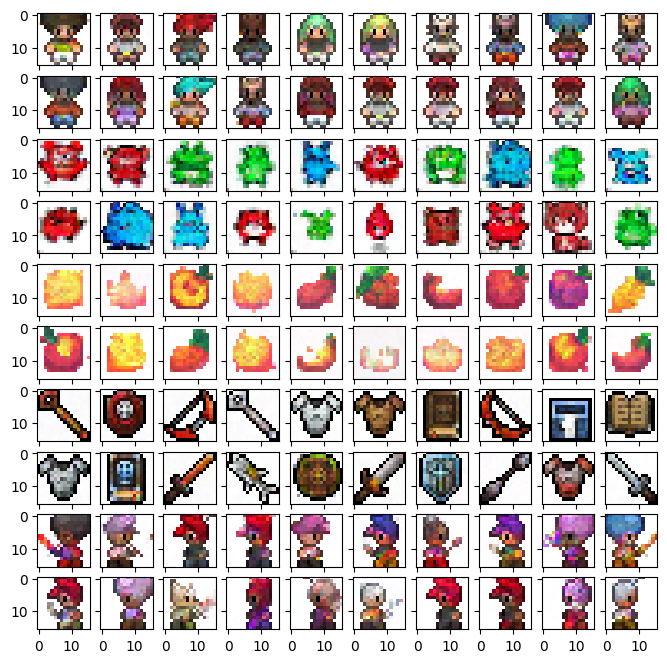

In [ ]:
new_image = diffusion_model.sample(100, labels, 2)
fig, ax = plt.subplots(nrows=10, ncols=10,figsize=(8, 8), \
                        sharey=True, sharex=True)

new_images = np.transpose(new_image.to("cpu"), (0, 2, 3, 1))
for img, fig_x in zip(new_images, ax.flatten()):
    fig_x.imshow(img)
    fig_x.grid(False)

In [ ]:
diffusion_model.save_model("conditional_modal.pt")

In [ ]:
model = UNet(in_channels=3, out_channels=3, n_steps=n_steps, n_classes=5).to(device)
diffusion_model = DiffusionModel(model, img_size=16, n_steps=n_steps, is_conditioned=True)

In [ ]:
diffusion_model.upload_weights("conditional_modal.pt")